In [1]:
import sys
import matplotlib.animation
print matplotlib.animation.writers.list()
print sys.path

sys.path.insert(0,'/home/antolikjan/projects/mozaikold/contrib/')
#sys.path.insert(0,'/home/antolikjan/remote/cluster_UNIC/dev/pkg/mozaik/mozaik/contrib/')
#sys.path.insert(0,'/home/antolikjan/remote/cluster_UNIC/dev/pkg/mozaik/mozaik/contrib/PushPullCCLISSOMModelSSIzL23')

import numpy
import mozaik
from mozaik.controller import run_workflow, setup_logging
from mozaik.storage.datastore import Hdf5DataStore,PickledDataStore
from parameters import ParameterSet
from mozaik.visualization.plotting import *

import lsv1m_paper

from mozaik.analysis.technical import NeuronAnnotationsToPerNeuronValues
from mozaik.tools.mozaik_parametrized import colapse, colapse_to_dictionary, MozaikParametrized
from mozaik.analysis.analysis import *
from mozaik.analysis.vision import *
from mozaik.storage.queries import *
from mozaik.visualization.helper_functions import *

#from analysis_and_visualization import perform_analysis_and_visualization
%matplotlib inline

setup_logging()

#data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/DATA/LSV1M_FINAL/STC_SelfSustainedPushPull_ParameterSearch_____sigma:1.4_size:0.17_K:1000_base_weight:0.0005_tau_rec:30_base_weight:0.0009_tau_m:17.0_tau_syn_E:7.0_tau_syn_I:11.0_v_thresh:-53_density:1500_sx:4000_ExcInhAfferentRatio:1.0_base_weight:0.0021_stdev:2.2','store_stimuli': False}),replace=True)
data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/jantolik/projects/mozaiknew/contrib/LSV1M_IDV/20200619-232048[param_large.defaults]CombinationParamSearch{14}/SelfSustainedPushPull_ParameterSearch_____arborization_scaler:1.0_arborization_constant:300_base_weight:0.0014_tau_rec:150_K:1480_tau_rec:10_base_weight:0.0009_tau_syn_E:7.5_tau_syn_I:13_density:600_sx:7000_base_weight:0.0021_tau_rec:15_stdev:1.5','store_stimuli': False}),replace=True)
  
    
NeuronAnnotationsToPerNeuronValues(data_store,ParameterSet({})).analyse()
analog_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids23 = param_filter_query(data_store,sheet_name="V1_Exc_L2/3").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh23 = param_filter_query(data_store,sheet_name="V1_Inh_L2/3").get_segments()[0].get_stored_esyn_ids()

#find neuron with preference closet to 0  
l4_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L4')[0]
l4_exc_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Exc_L4')[0]
l4_exc = analog_ids[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or.get_value_by_id(analog_ids),l4_exc_phase.get_value_by_id(analog_ids))])]
l4_inh_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Inh_L4')[0]
l4_inh_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Inh_L4')[0]
l4_inh = analog_ids_inh[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_inh_or.get_value_by_id(analog_ids_inh),l4_inh_phase.get_value_by_id(analog_ids_inh))])]
l4_exc_or_many = numpy.array(l4_exc_or.ids)[numpy.nonzero(numpy.array([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or.values,l4_exc_phase.values)]) < 0.1)[0]]

[u'imagemagick_file', u'imagemagick', u'ffmpeg', u'ffmpeg_file']
['', '/home/antolikjan/installs/nest-2.2.1/build/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaikold/lib/python2.7', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/plat-x86_64-linux-gnu', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/lib-old', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/lib-dynload', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/mozaikold/local/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaikold/local/lib/python2.7/site-packages/PIL', '/home/antolikjan/virt_env/mozaikold/local/lib/python2.7/site-packages/neo-0.7.2-py2.7.egg', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/site-packages/PIL', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/site-packages/n

IOError: [Errno 2] No such file or directory: '/home/jantolik/projects/mozaiknew/contrib/LSV1M_IDV/20200619-232048[param_large.defaults]CombinationParamSearch{14}/SelfSustainedPushPull_ParameterSearch_____arborization_scaler:1.0_arborization_constant:300_base_weight:0.0014_tau_rec:150_K:1480_tau_rec:10_base_weight:0.0009_tau_syn_E:7.5_tau_syn_I:13_density:600_sx:7000_base_weight:0.0021_tau_rec:15_stdev:1.5/datastore.recordings.pickle'

In [16]:
%matplotlib inline
analog_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_esyn_ids()
spike_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_spike_train_ids()
spike_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_spike_train_ids()

analog_ids23 = param_filter_query(data_store,sheet_name="V1_Exc_L2/3").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh23 = param_filter_query(data_store,sheet_name="V1_Inh_L2/3").get_segments()[0].get_stored_esyn_ids()
spike_ids23 = param_filter_query(data_store,sheet_name="V1_Exc_L2/3").get_segments()[0].get_stored_spike_train_ids()
spike_ids_inh23 = param_filter_query(data_store,sheet_name="V1_Inh_L2/3").get_segments()[0].get_stored_spike_train_ids()


l4_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L4')[0]
l23_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L2/3')[0]

l4_exc_or_many = numpy.array(spike_ids)[numpy.nonzero(numpy.array([circular_dist(l4_exc_or.get_value_by_id(i),0,numpy.pi)  for i in spike_ids]) < 0.25)[0]]
l23_exc_or_many = numpy.array(spike_ids23)[numpy.nonzero(numpy.array([circular_dist(l23_exc_or.get_value_by_id(i),0,numpy.pi)  for i in spike_ids23]) < 0.25)[0]]


idx23 = data_store.get_sheet_indexes(sheet_name='V1_Exc_L2/3',neuron_ids=l23_exc_or_many)
idx4 = data_store.get_sheet_indexes(sheet_name='V1_Exc_L4',neuron_ids=l4_exc_or_many)

x = data_store.get_neuron_postions()['V1_Exc_L4'][0][idx4]
y = data_store.get_neuron_postions()['V1_Exc_L4'][1][idx4]
center4 = l4_exc_or_many[numpy.nonzero(numpy.sqrt(numpy.multiply(x,x)+numpy.multiply(y,y)) < 0.25)[0]]
#center4 = l4_exc_or_many[numpy.nonzero(numpy.logical_and(x<0.1 , y<0.1))[0]]
x = data_store.get_neuron_postions()['V1_Exc_L2/3'][0][idx23]
y = data_store.get_neuron_postions()['V1_Exc_L2/3'][1][idx23]
#center23 = l23_exc_or_many[numpy.nonzero(numpy.logical_and(x<0.1 , y<0.1))[0]]
center23 = l23_exc_or_many[numpy.nonzero(numpy.sqrt(numpy.multiply(x,x)+numpy.multiply(y,y)) < 0.25)[0]]
    
analog_center4 = set(center4).intersection(analog_ids)
analog_center23 = set(center23).intersection(analog_ids23)

print len(analog_center4)
print len(analog_center23)
print len(center4)
print len(center23)




1
1
76
71


In [9]:
ii = data_store.get_sheet_indexes(sheet_name='V1_Exc_L4',neuron_ids=analog_ids)
x = data_store.get_neuron_postions()['V1_Exc_L4'][0][ii]
print x

[-3.03673366 -2.11470237 -2.41356604 -0.57990129 -1.64363413  2.97686032
  3.28002449 -2.90652777 -1.90872606  0.06067539 -1.59392689  0.01316668
  2.70156597  1.25998496 -1.81794693 -2.90248911  1.92327422 -1.33646004
  2.59026879 -1.74436763 -1.33786405  1.09402795  2.67935403 -0.40228944
  1.66245706 -0.45353231 -1.13667684  0.62148494 -1.70432868 -3.01894074
 -2.39105882 -0.28383789 -1.63980047 -3.02717846 -0.35940175 -0.2382483
 -2.46919801 -0.39732693  1.1390868  -0.26727653  2.81974556 -0.8961677
  1.66239136  1.37087691 -0.58226995 -0.46685528 -0.27884876 -2.76613521
 -0.90407729 -1.08423174 -1.14379744  0.42353041 -1.62148296 -0.21028319
 -1.08356556  2.56444682 -0.53638405  0.83088131  0.57508671  2.58043899
  0.6346203  -1.58897536 -1.67814399  1.80326499 -3.32472198 -1.08535898
 -0.27820662  2.58716927 -0.16619029  3.25622332  1.44061388 -3.07150765
  2.98578831 -0.08635327  1.84404093 -1.91939044 -1.12898581  1.39281961
  0.53344431 -0.21022105  2.26288233 -1.34914507 -1.6

In [7]:
print len(l4_exc_or_many)
print len(l23_exc_or_many)
print len(analog_ids)
print len(analog_ids23)

239
234
100
100


In [5]:
TrialAveragedFiringRate(param_filter_query(data_store,sheet_name=['V1_Exc_L4','V1_Exc_L2/3'],st_name='DriftingSinusoidalGratingDisk'),ParameterSet({})).analyse()
dsv = param_filter_query(data_store,sheet_name=['V1_Exc_L4','V1_Exc_L2/3'],st_name='DriftingSinusoidalGratingDisk')
Analog_F0andF1(dsv,ParameterSet({})).analyse()
dsv = param_filter_query(data_store,st_name='InternalStimulus',st_direct_stimulation_name="None")
Analog_MeanSTDAndFanoFactor(dsv,ParameterSet({})).analyse()

pnv = param_filter_query(data_store,st_name='InternalStimulus',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_MeanSTDAndFanoFactor'],value_name='Mean(VM)',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Vm')
OperationPNVfromPNVS(pnv,lambda x,y: -(x+y),'-(x+y)',dsv,ParameterSet({})).analyse()

pnv = param_filter_query(data_store,st_name='InternalStimulus',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_MeanSTDAndFanoFactor'],value_name='Mean(VM)',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Vm')
OperationPNVfromPNVS(pnv,lambda x,y: -(x+y),'-(x+y)',dsv,ParameterSet({})).analyse()
    
    
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',analysis_algorithm='TrialAveragedFiringRate')    
SizeTuningAnalysis(dsv,ParameterSet({'neurons' : center4.tolist(), 'sheet_name' : 'V1_Exc_L4'})).analyse()
SizeTuningAnalysis(dsv,ParameterSet({'neurons' : center23.tolist(), 'sheet_name' : 'V1_Exc_L2/3'})).analyse()        


INFO:Mozaik:Starting TrialAveragedFiringRate analysis
  Starting TrialAveragedFiringRate analysis
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6833474142984373, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Firing rate'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.247229904325614, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Firing rate'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neur

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5300035264417603, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Firing rate'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neu

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2609562162602161, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Firing rate'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "ne

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9445528390750783, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Firing rate'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "ne

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.39701325800598525, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Firing rate'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neur

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":3.0, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Firing rate'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "perio

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.7075424620617253, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Firing rate'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuro

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.22277041376885792, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Firing rate'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'TrialAveragedFiringRate', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neur

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6833474142984373, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "perio

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.7075424620617253, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "perio

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.247229904325614, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.125, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "shee

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5300035264417603, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "perio

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.16687211187345607, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "perio

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.247229904325614, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.16687211187345607, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "peri

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.22277041376885792, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "peri

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.2973933552682636, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9445528390750783, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5300035264417603, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":3.0, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2609562162602161, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.2973933552682636, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "perio

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.39701325800598525, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "perio

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.7075424620617253, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2609562162602161, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "perio

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":3.0, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.39701325800598525, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "peri

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.125, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "she

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6833474142984373, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.22277041376885792, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "perio

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9445528390750783, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "perio

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6833474142984373, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.247229904325614, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":N

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.16687211187345607, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.247229904325614, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.39701325800598525, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.16687211187345607, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.125, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.22277041376885792, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.125, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.6833474142984373, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":3.0, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_na

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.2973933552682636, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.7075424620617253, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5300035264417603, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9445528390750783, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.2973933552682636, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.7075424620617253, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2609562162602161, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":3.0, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_n

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.39701325800598525, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5300035264417603, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2609562162602161, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.22277041376885792, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.9445528390750783, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'F1_Exc_Cond'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_F0andF1', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'STD(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'STD(VM)'}
INFO:Mo

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'X_ON', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'X_ON', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'STD(ICond)'}
INFO:Mozaik:Wa

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Inh_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'STD(ECond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Inh_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'STD(ICond)'}
INFO

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Inh_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Inh_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'STD(ECond)'}
IN

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'STD(ECond)'}
IN

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'X_OFF', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'Mean(ICond)'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'Analog_MeanSTDAndFanoFactor', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'X_OFF', "stimulus_id":'{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":1680, "frame_duration":1680, "name":\'InternalStimulus\', "trial":None}', "value_name":'Mean(VM)'}
INFO:Mozaik:W

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.2609562162602161, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.16687211187345607, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', 

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.125, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.16687211187345607, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue',

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.125, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
OperationPNVfromPNVS analysis took: 1.12535881996seconds
INFO:Mozaik:Starting OperationPNVfromPNVS analysis
  Starting OperationPNVfromPNVS analysis
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.247229904325614, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', 

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5300035264417603, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue'

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5300035264417603, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue',

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.39701325800598525, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'SizeTuningAnalysis', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":None, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Max. suppressive radius of Firing rate'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'SizeTuningAnalysis', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "ne

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'SizeTuningAnalysis', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":None, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Suppression index of Firing rate'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'SizeTuningAnalysis', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron"

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'SizeTuningAnalysis', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":10, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":None, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Suppression index of Firing rate'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'SizeTuningAnalysis', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'SizeTuningAnalysis', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L2/3', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":2002, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":None, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'Counter-suppression index of Firing rate'}
SizeTuningAnalysis analysis took: 1.77273011208seconds


In [4]:
class SizeTuningAnalysis(Analysis):
      """
      Calculates the size tuning properties   
      """   
        
      required_parameters = ParameterSet({
          'neurons': list,  # list of neurons for which to compute this (normally this analysis will only makes sense for neurons for which the sine grating disk stimulus has been optimally oriented)
          'sheet_name' : str
      })      
        
      
      def perform_analysis(self):
                dsv = queries.param_filter_query(self.datastore,identifier='PerNeuronValue',sheet_name=self.parameters.sheet_name,st_name='DriftingSinusoidalGratingDisk')
                
                if len(dsv.get_analysis_result()) == 0: return
                assert queries.ads_with_equal_stimulus_type(dsv)
                assert queries.equal_ads(dsv,except_params=['stimulus_id'])
                self.pnvs = dsv.get_analysis_result()
                
                # get stimuli
                self.st = [MozaikParametrized.idd(s.stimulus_id) for s in self.pnvs]
                
                
                # transform the pnvs into a dictionary of tuning curves according along the 'radius' parameter
                # also make sure they are ordered according to the first pnv's idds 
                
                self.tc_dict = colapse_to_dictionary([z.get_value_by_id(self.parameters.neurons) for z in self.pnvs],self.st,"radius")
                for k in self.tc_dict.keys():
                        crf_sizes = []
                        supp_sizes= []
                        sis = []
                        max_responses=[]
                        
                        # we will do the calculation neuron by neuron
                        for i in xrange(0,len(self.parameters.neurons)):
                            
                            rads = self.tc_dict[k][0]
                            values = numpy.array([a[i] for a in self.tc_dict[k][1]])
                            
                            # sort them based on radiuses
                            rads , values = zip(*sorted(zip(rads,values)))
                                                        
                            max_response = numpy.max(values)
                            crf_index  = numpy.argmax(values)
                            crf_size = rads[crf_index]
                            
                            if crf_index < len(values)-1:
                                supp_index = crf_index+numpy.argmin(values[crf_index+1:])+1
                            else:
                                supp_index = len(values)-1
                            
                            supp_size = rads[supp_index]                                
                            
                            if values[crf_index] != 0:
                                si = (values[crf_index]-values[supp_index])/values[crf_index]
                            else:
                                si = 0
                            
                            crf_sizes.append(crf_size)
                            supp_sizes.append(supp_size)
                            sis.append(si)
                            max_responses.append(max_response)
                            
                            
                        self.datastore.full_datastore.add_analysis_result(PerNeuronValue(max_responses,self.parameters.neurons,self.st[0].params()["radius"].units,value_name = 'Max. response of ' + self.pnvs[0].value_name ,sheet_name=self.parameters.sheet_name,tags=self.tags,period=None,analysis_algorithm=self.__class__.__name__,stimulus_id=str(k)))
                        self.datastore.full_datastore.add_analysis_result(PerNeuronValue(crf_sizes,self.parameters.neurons,self.st[0].params()["radius"].units,value_name = 'Max. facilitation radius of ' + self.pnvs[0].value_name ,sheet_name=self.parameters.sheet_name,tags=self.tags,period=None,analysis_algorithm=self.__class__.__name__,stimulus_id=str(k)))
                        self.datastore.full_datastore.add_analysis_result(PerNeuronValue(supp_sizes,self.parameters.neurons,self.st[0].params()["radius"].units,value_name = 'Max. suppressive radius of ' + self.pnvs[0].value_name ,sheet_name=self.parameters.sheet_name,tags=self.tags,period=None,analysis_algorithm=self.__class__.__name__,stimulus_id=str(k)))
                        self.datastore.full_datastore.add_analysis_result(PerNeuronValue(sis,self.parameters.neurons,None,value_name = 'Suppression index of ' + self.pnvs[0].value_name ,sheet_name=self.parameters.sheet_name,tags=self.tags,period=None,analysis_algorithm=self.__class__.__name__,stimulus_id=str(k)))

dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',analysis_algorithm='TrialAveragedFiringRate')    
SizeTuningAnalysis(dsv,ParameterSet({'neurons' : center4.tolist(), 'sheet_name' : 'V1_Exc_L4'})).analyse()
SizeTuningAnalysis(dsv,ParameterSet({'neurons' : center23.tolist(), 'sheet_name' : 'V1_Exc_L2/3'})).analyse()        


  Starting SizeTuningAnalysis analysis
SizeTuningAnalysis analysis took: 1.63343214989seconds
  Starting SizeTuningAnalysis analysis


SizeTuningAnalysis analysis took: 1.56236219406seconds


In [4]:
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',value_name=['(x+y)(F1_Vm,-(x+y)(F0_Vm,Mean(VM)))'])    
PlotTuningCurve(dsv, ParameterSet({'parameter_name' : 'radius', 'neurons': center4.tolist(), 'sheet_name' : 'V1_Exc_L2/3','centered'  : False,'mean' : True, 'polar' : False, 'pool'  : False})).plot()

#{'fontsize' : fontsize,'title' : None,'x_label' : None , 'y_label' : r'Firing rate ($\frac{sp}{s}$)', 'y_lim' : (0,6), 'x_axis' : False, 'x_ticks' : False,'colors' : {'contrast : 100' : '#000000' , 'contrast : ' + low_contrast : '#0073B3'}})
        

TypeError: unbound method __init__() must be called with Plotting instance as first argument (got PlotTuningCurve instance instead)

In [6]:
#sys.path.insert(0,'/home/antolikjan/remote/cluster_UNIC/dev/pkg/mozaik/mozaik/')
del mozaik.analysis.vision
sys.path.insert(0,'/home/antolikjan/remote/IOV/projects/mozaiknew/')
import mozaik.analysis.vision
reload(mozaik.analysis.vision)
print mozaik.analysis.vision.__file__
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',analysis_algorithm='TrialAveragedFiringRate')    
mozaik.analysis.vision.SizeTuningAnalysis(dsv,ParameterSet({'neurons' : list(center4), 'sheet_name' : 'V1_Exc_L4'})).analyse()
mozaik.analysis.vision.SizeTuningAnalysis(dsv,ParameterSet({'neurons' : list(center23), 'sheet_name' : 'V1_Exc_L2/3'})).analyse()        


/home/antolikjan/remote/cluster_UNIC/dev/pkg/mozaik/mozaik/mozaik/analysis/vision.pyc


  Starting SizeTuningAnalysis analysis
SizeTuningAnalysis analysis took: 1.65343999863seconds
  Starting SizeTuningAnalysis analysis


SizeTuningAnalysis analysis took: 2.03616094589seconds


AttributeError: 'NoneType' object has no attribute 'keys'

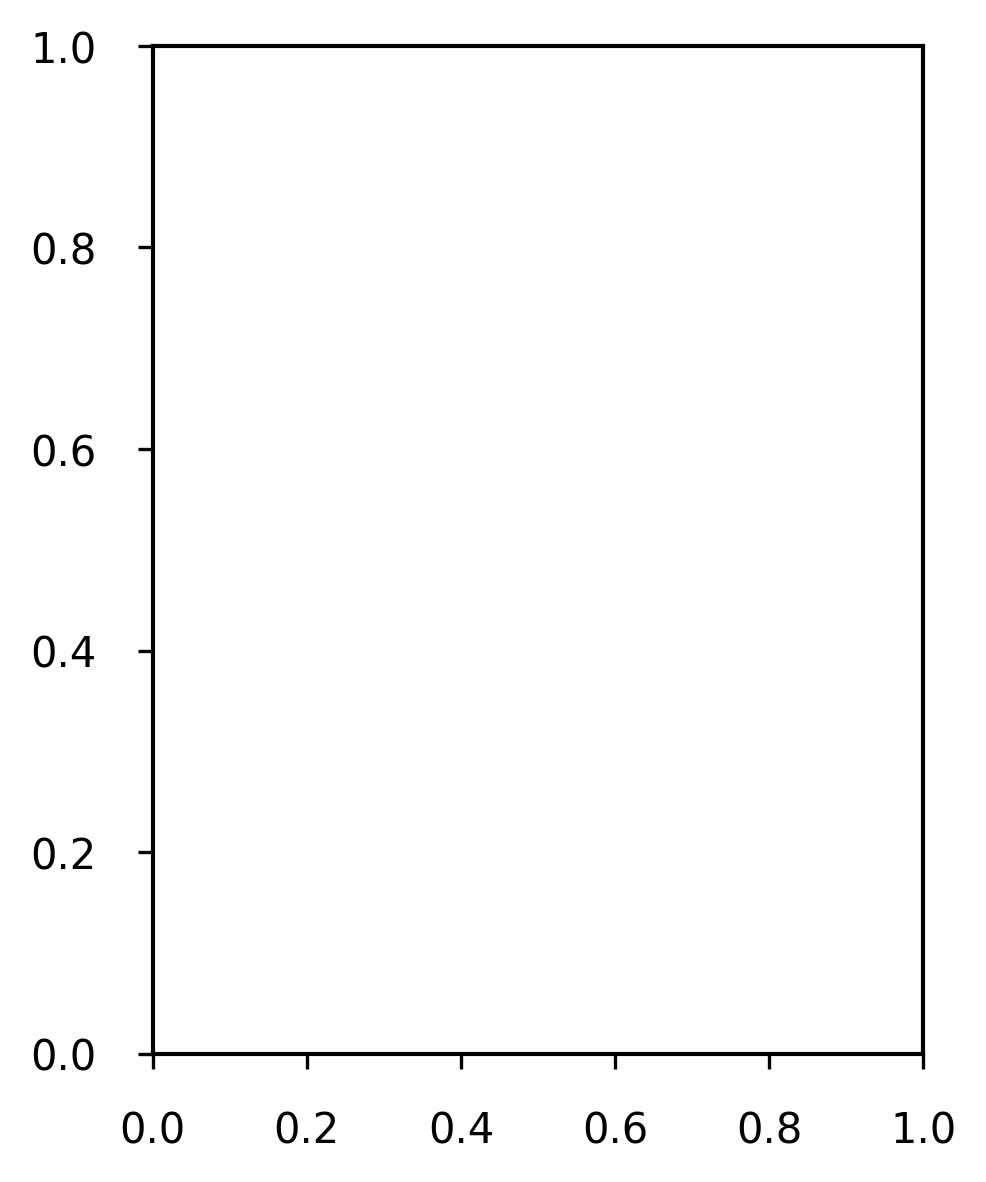

In [40]:
import lsv1m_paper
reload(lsv1m_paper)
lsv1m_paper.SizeTuningOverview(data_store,ParameterSet({'l4_neurons' : list(center4),'l23_neurons' : list(center23),'l4_neurons_analog' : list(analog_center4),'l23_neurons_analog' : list(analog_center23)}),plot_file_name='SizeTuningOverview.png',fig_param={'dpi' : 300,'figsize': (18,8)}).plot()

In [5]:
print param_filter_query(data_store,value_name=['Suppression index of Firing rate'],sheet_name='V1_Exc_L2/3',ads_unique=True,st_contrast=100).get_analysis_result()[0].get_value_by_id(list(center23))
print param_filter_query(data_store,value_name=['Suppression index of Firing rate'],sheet_name='V1_Exc_L2/3',ads_unique=True,st_contrast=5).get_analysis_result()[0].get_value_by_id(list(center23))

ValueError: 46843 is not in list

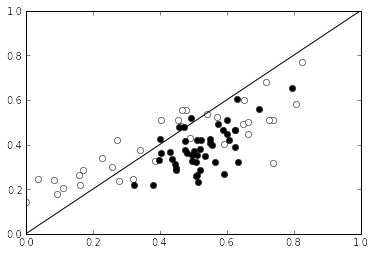

In [146]:
name = 'Suppression index of Firing rate'
a = param_filter_query(data_store,value_name=[name],sheet_name='V1_Exc_L4',ads_unique=True,st_contrast=100).get_analysis_result()[0].get_value_by_id(list(center4))
b = param_filter_query(data_store,value_name=[name],sheet_name='V1_Exc_L4',ads_unique=True,st_contrast=5).get_analysis_result()[0].get_value_by_id(list(center4))
c = param_filter_query(data_store,value_name=[name],sheet_name='V1_Exc_L2/3',ads_unique=True,st_contrast=100).get_analysis_result()[0].get_value_by_id(list(center23))
d = param_filter_query(data_store,value_name=[name],sheet_name='V1_Exc_L2/3',ads_unique=True,st_contrast=5).get_analysis_result()[0].get_value_by_id(list(center23))


pylab.figure()
pylab.plot(a,b,'ow')
pylab.plot(c,d,'ok')
pylab.plot([0,1],[0,1],'k')

0.157746882145
0.121833181376
0.159324408123
0.112049184583


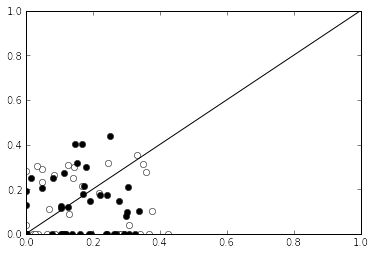

In [149]:
name = 'Counter-suppression index of Firing rate'
a = param_filter_query(data_store,value_name=[name],sheet_name='V1_Exc_L4',ads_unique=True,st_contrast=100).get_analysis_result()[0].get_value_by_id(list(center4))
b = param_filter_query(data_store,value_name=[name],sheet_name='V1_Exc_L4',ads_unique=True,st_contrast=5).get_analysis_result()[0].get_value_by_id(list(center4))
c = param_filter_query(data_store,value_name=[name],sheet_name='V1_Exc_L2/3',ads_unique=True,st_contrast=100).get_analysis_result()[0].get_value_by_id(list(center23))
d = param_filter_query(data_store,value_name=[name],sheet_name='V1_Exc_L2/3',ads_unique=True,st_contrast=5).get_analysis_result()[0].get_value_by_id(list(center23))

print numpy.mean(a)
print numpy.mean(b)
print numpy.mean(c)
print numpy.mean(d)

pylab.figure()
pylab.plot(a,b,'ow')
pylab.plot(c,d,'ok')
pylab.plot([0,1],[0,1],'k')

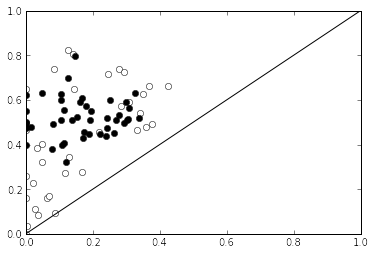

In [154]:
name = 'Suppression index of Firing rate'
a = param_filter_query(data_store,value_name=[name],sheet_name='V1_Exc_L4',ads_unique=True,st_contrast=100).get_analysis_result()[0].get_value_by_id(list(center4))
c = param_filter_query(data_store,value_name=[name],sheet_name='V1_Exc_L2/3',ads_unique=True,st_contrast=100).get_analysis_result()[0].get_value_by_id(list(center23))

name = 'Counter-suppression index of Firing rate'
b = param_filter_query(data_store,value_name=[name],sheet_name='V1_Exc_L4',ads_unique=True,st_contrast=100).get_analysis_result()[0].get_value_by_id(list(center4))
d = param_filter_query(data_store,value_name=[name],sheet_name='V1_Exc_L2/3',ads_unique=True,st_contrast=100).get_analysis_result()[0].get_value_by_id(list(center23))

pylab.figure()
pylab.plot(a,b,'ow')
pylab.plot(c,d,'ok')
pylab.plot([0,1],[0,1],'k')

In [13]:
print lsv1m_paper.__file__

/home/antolikjan/remote/cluster_UNIC/dev/pkg/mozaik/mozaik/contrib/lsv1m_paper.pyc


/home/antolikjan/projects/mozaikold/contrib/lsv1m_paper.py:2237: RuntimeWarning: divide by zero encountered in divide
  ax.set_ylim(0,4.5)


76 76
71 71
ERROR:  368.074596768
SI (high-contrast): L4  (0.10482503901024225, 0.012851850968687998)
SI (high-contrast): L23  (0.24380355237540885, 0.010801856975795393)
SI (low-contrast): L4 (0.25261537278486479, 0.018115223911964587)
SI (low-contrast): L23 (0.37223592662478538, 0.011535006394422596)
CSI (high-contrast): L4  (0.044476275482060471, 0.0067595330215186183)
CSI (high-contrast): L23  (0.066829920651824956, 0.0066099211485374215)
CSI (low-contrast): L4 (0.10088616272681751, 0.01271602822565765)
CSI (low-contrast): L23 (0.11492685671369357, 0.010910496940953298)
MFR (high-contrast): L4  (3.0334928229665068, 0.19948606903337582)
MFR (high-contrast): L23  (1.9154929577464785, 0.068951950972141976)
MFR (low-contrast): L4 (2.3086124401913888, 0.12953159298925579)
MFR (low-contrast): L23 (1.6935552710200599, 0.025775165542900758)


SizeTuningOverviewNew plotting took: 1228.27668691seconds


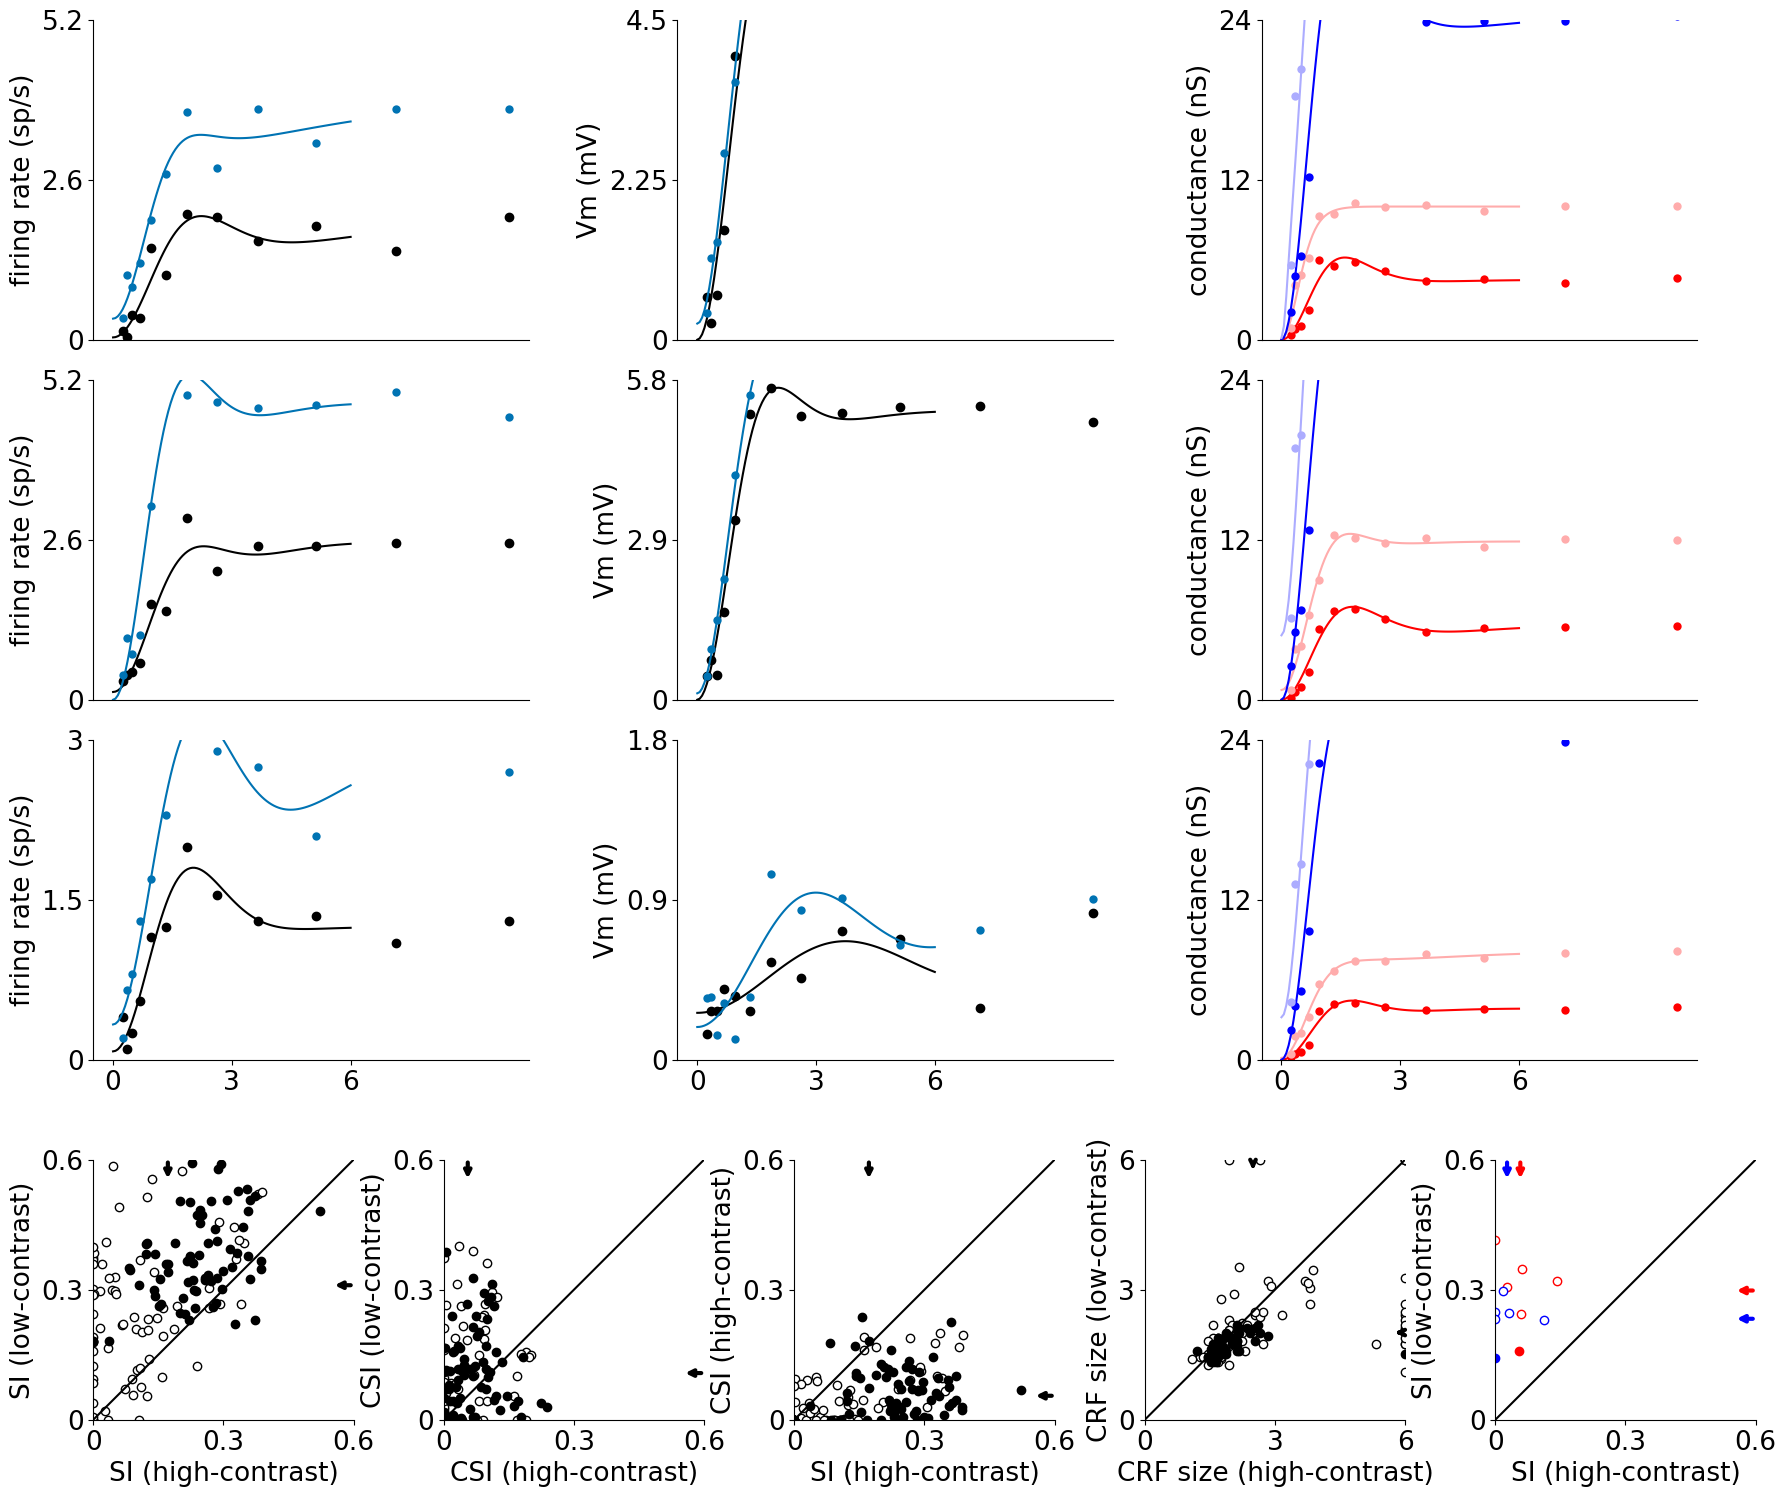

In [39]:
import lsv1m_paper
reload(lsv1m_paper)
lsv1m_paper.SizeTuningOverviewNew(data_store,ParameterSet({'l4_neurons' : list(center4),'l23_neurons' : list(center23),'l4_neurons_analog' : list(analog_center4),'l23_neurons_analog' : list(analog_center23)}),plot_file_name='SizeTuningOverview.png',fig_param={'dpi' : 100,'figsize': (18,15.6)}).plot()

/home/antolikjan/projects/mozaikold/contrib/lsv1m_paper.py:2133: RuntimeWarning: divide by zero encountered in divide
  fitfunc = lambda p,x:  p[0]*erf(x/p[1])**2 - p[2] *erf(x/(p[1] + p[3]))**2 + p[4] *erf(x/(p[1]+ p[3]+p[5]))**2 + p[6]


60 60
65 65
ERROR:  224.968905181
SI (high-contrast): L4  (0.2423480631522105, 0.012832113073058357)
SI (high-contrast): L23  (0.34357742428874871, 0.0095153630417429448)
SI (low-contrast): L4 (0.23241569333808101, 0.012654996871443986)
SI (low-contrast): L23 (0.28679948182043574, 0.016404316786059456)
CSI (high-contrast): L4  (0.04071896612409738, 0.0056149543218457151)
CSI (high-contrast): L23  (0.052338910611475553, 0.0072776586410241264)
CSI (low-contrast): L4 (0.050683177356357523, 0.0088522907496790607)
CSI (low-contrast): L23 (0.070176586695960746, 0.010664663741375152)
MFR (high-contrast): L4  (2.0060606060606054, 0.040948353773597249)
MFR (high-contrast): L23  (1.889044289044288, 0.019270236233064168)
MFR (low-contrast): L4 (2.390909090909092, 0.036178682277292713)
MFR (low-contrast): L23 (2.1818181818181817, 0.089150402363088285)


SizeTuningOverviewNew plotting took: 2213.43042994seconds


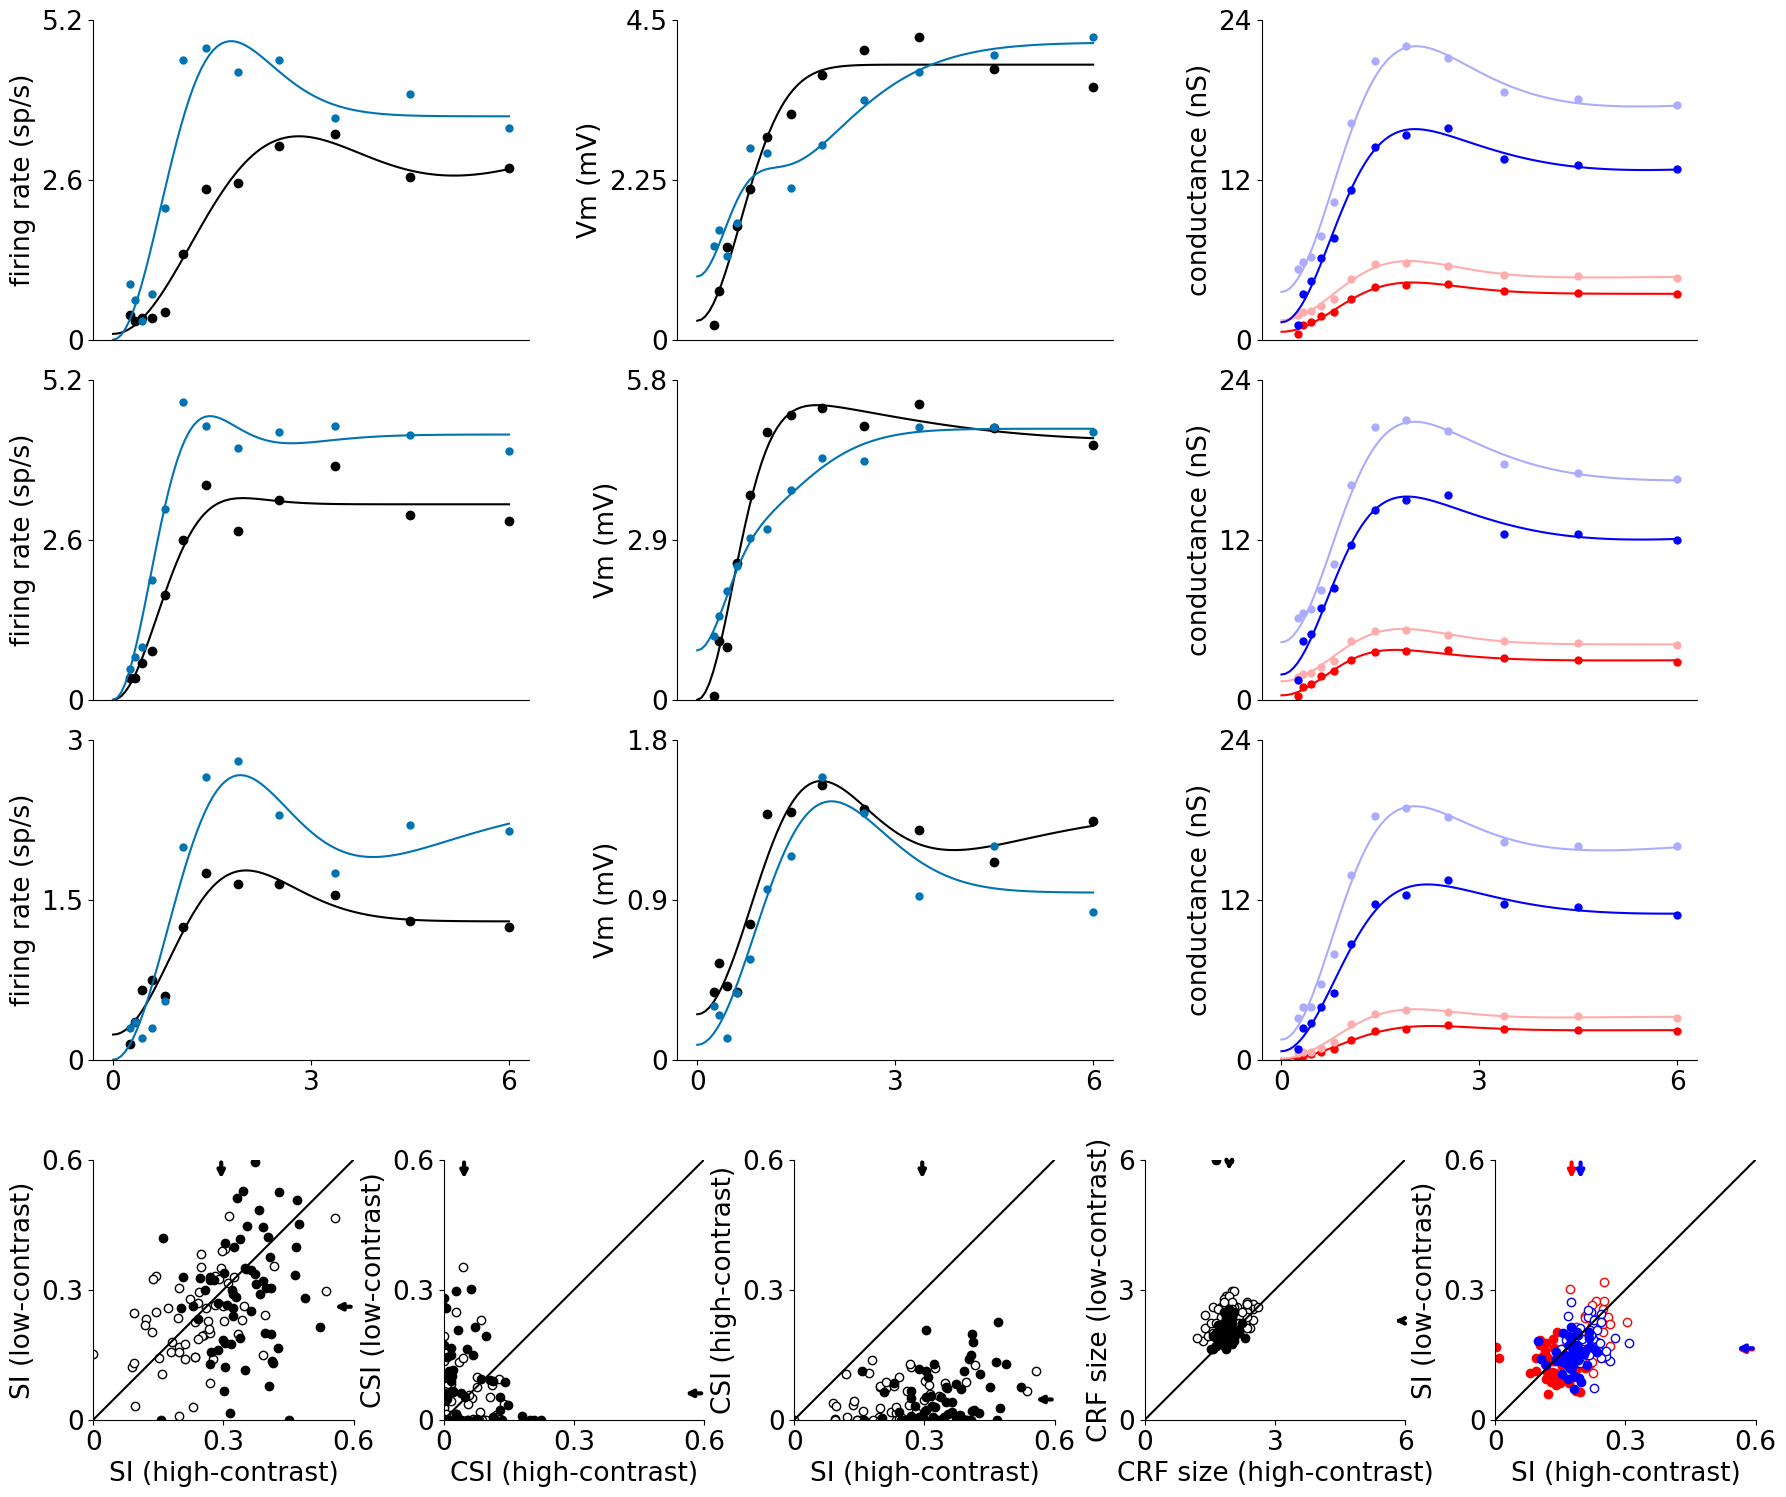

In [3]:
import lsv1m_paper
reload(lsv1m_paper)
lsv1m_paper.SizeTuningOverviewNew(data_store,ParameterSet({'l4_neurons' : list(center4),'l23_neurons' : list(center23),'l4_neurons_analog' : list(analog_center4),'l23_neurons_analog' : list(analog_center23)}),plot_file_name='SizeTuningOverview.png',fig_param={'dpi' : 100,'figsize': (18,15.6)}).plot()

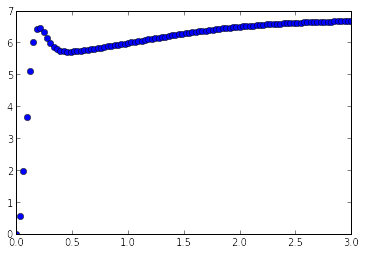

In [55]:
from scipy.special import erf

x = numpy.linspace(0,3.0,100)

fitfunc = lambda p,x:  p[0]*erf(x/p[1])**2 - p[2] *erf(x/(p[1] + p[3]))**2 + p[4] *erf(x/(p[1]+ p[3]+p[5]))**2 + p[6]
p0 = [10.0, 0.13, 4.4, 0.08,1.1 ,1.5,0]

y =fitfunc(p0,x)

#y =   19*(erf(x/0.43)**2 - 0.8 * erf(x/0.61)**2 + 0.13 * erf(x/2.0)**2)


pylab.plot(x,y,'o')

In [459]:
queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name='V1_Exc_L4',st_name='DriftingSinusoidalGratingDisk',analysis_algorithm='OperationPNVfromPNVS').print_content(full_ADS=True)
#queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name='V1_Exc_L4',st_name='DriftingSinusoidalGratingDisk',value_name='F0_Exc_Cond-Mean(ECond)',st_contrast=100).print_content()

  DSV info:
     Number of recordings: 0
     Number of ADS: 160
       PerNeuronValue : 160
  ANALYSIS RESULTS
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":10.0, "direct_stimulation_name":\'None\', "duration":20020, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.29989349386281, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Exc_Cond,Mean(ECond))'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4'

  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":20020, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.7870089645046369, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Exc_Cond,Mean(ECond))'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "co

  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":20020, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5632410317956211, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Exc_Cond,Mean(ECond))'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "co

  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":20020, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.28848517341650554, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":

  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":20020, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":2.537923679185567, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Inh_Cond,Mean(ICond))'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "con

  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":20020, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.4030963740011205, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Exc_Cond,Mean(ECond))'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "co

  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":10.0, "direct_stimulation_name":\'None\', "duration":20020, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.47648758389433893, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'x-y(F0_Inh_Cond,Mean(ICond))'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contra

  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":10.0, "direct_stimulation_name":\'None\', "duration":20020, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.125, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":1

  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":20020, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":1.8163233408437174, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Inh_Cond,Mean(ICond))'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "co

  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":20020, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5632410317956211, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'x-y(F0_Inh_Cond,Mean(ICond))'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contr

  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":20020, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.5632410317956211, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Inh_Cond,Mean(ICond))'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "co

  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":5, "density":10.0, "direct_stimulation_name":\'None\', "duration":20020, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.6657895622492103, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'x-y(F0_Inh_Cond,Mean(ICond))'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contras

  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":100, "density":10.0, "direct_stimulation_name":\'None\', "duration":20020, "frame_duration":7, "location_x":0.0, "location_y":0.0, "name":\'DriftingSinusoidalGratingDisk\', "orientation":0, "radius":0.14775858039999834, "size_x":11.0, "size_y":11.0, "spatial_frequency":0.8, "temporal_frequency":2, "trial":None}', "value_name":'-(x+y)(F0_Vm,Mean(VM))'}
  {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'OperationPNVfromPNVS', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":'{"module_path" :"mozaik.stimuli.vision.topographica_based","background_luminance":50.0, "contrast":

In [7]:
pnv = param_filter_query(data_store,st_name='InternalStimulus',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_MeanSTDAndFanoFactor'],value_name='Mean(ECond)',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Exc_Cond')
OperationPNVfromPNVS(pnv,lambda x,y: x-y,'x-y',dsv,ParameterSet({})).analyse()

pnv = param_filter_query(data_store,st_name='InternalStimulus',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_MeanSTDAndFanoFactor'],value_name='Mean(ECond)',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Exc_Cond')
OperationPNVfromPNVS(pnv,lambda x,y: x-y,'x-y',dsv,ParameterSet({})).analyse()

pnv = param_filter_query(data_store,st_name='InternalStimulus',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_MeanSTDAndFanoFactor'],value_name='Mean(ICond)',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Inh_Cond')
OperationPNVfromPNVS(pnv,lambda x,y: x-y,'x-y',dsv,ParameterSet({})).analyse()

pnv = param_filter_query(data_store,st_name='InternalStimulus',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_MeanSTDAndFanoFactor'],value_name='Mean(ICond)',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingDisk',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Inh_Cond')
OperationPNVfromPNVS(pnv,lambda x,y: x-y,'x-y',dsv,ParameterSet({})).analyse()

  Starting OperationPNVfromPNVS analysis
OperationPNVfromPNVS analysis took: 3.5377509594seconds
  Starting OperationPNVfromPNVS analysis
OperationPNVfromPNVS analysis took: 3.98171401024seconds
  Starting OperationPNVfromPNVS analysis
OperationPNVfromPNVS analysis took: 3.23568892479seconds
  Starting OperationPNVfromPNVS analysis
OperationPNVfromPNVS analysis took: 3.96658301353seconds


  Starting OperationPNVfromPNVS analysis
OperationPNVfromPNVS analysis took: 2.93790793419seconds
  Starting OperationPNVfromPNVS analysis
OperationPNVfromPNVS analysis took: 3.18715906143seconds


In [12]:
def get_vals(dsv,neuron):
        assert queries.ads_with_equal_stimulus_type(dsv)
        assert queries.equal_ads(dsv,except_params=['stimulus_id'])
        pnvs = dsv.get_analysis_result()

        st = [MozaikParametrized.idd(s.stimulus_id) for s in pnvs]
        tc_dict = colapse_to_dictionary([z.get_value_by_id(neuron) for z in pnvs],st,"radius")

        rads = tc_dict.values()[0][0]*2
        values = tc_dict.values()[0][1]
        a, b = zip(*sorted(zip(rads,values)))
        return numpy.array(a),numpy.array(b)

    
def _fitgaussian(X,Y):
          from scipy.special import erf

          #fitfunc = lambda p,x:  p[0]*erf(x/p[1])**2 - p[0]*p[2] *erf(x/(p[1] + p[3]))**2 + p[0]*p[4]*p[2] *erf(x/(p[1]+ p[3]+p[5]))**2 + p[6]
          fitfunc = lambda p,x:  p[0]*erf(x/p[1])**2 - p[2] *erf(x/(p[1] + p[3]))**2 + p[4] *erf(x/(p[1]+ p[3]+p[5]))**2 + p[6]
          errfunc = lambda p, x, y: numpy.linalg.norm(fitfunc(p,x) - y) # Distance to the target function
          
          err = []
          res = []
          p0 = [8.0, 0.43, 8.0, 0.18, 3.0 ,1.4,numpy.min(Y)] # Initial guess for the parameters

          for i in xrange(2,15):
            for j in xrange(5,11):
              for k in xrange(1,5):
                p0[1] = i/15.0
                p0[3] = j/10.0
                p0[5] = k/2.0
              r = scipy.optimize.fmin_tnc(errfunc, numpy.array(p0), args=(numpy.array(X),numpy.array(Y)),bounds=[(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None)],approx_grad=True)    
              res.append(r)
              err.append(errfunc(r[0],numpy.array(X),numpy.array(Y)))

          res=res[numpy.argmin(err)]

          x = numpy.linspace(0,X[-1],100)

          pylab.figure()
          pylab.plot(x,fitfunc(res[0],x),'-')
          pylab.hold('on')          
          pylab.plot(X,Y,'x')
          pylab.title(str(res[0]))

          
          return fitfunc(res[0],x)

def size_tuning_measures(rads,values):
              crf_index  = numpy.argmax(values[:-1]-values[1:] > 0)
              if crf_index == 0: crf_index = len(values)-1
        
              crf_size = rads[crf_index]
              
              if crf_index < len(values)-1 and crf_index != 0:
                  supp_index = crf_index+numpy.argmin(values[crf_index+1:])+1
              else:
                  supp_index = len(values)-1

              if supp_index < len(values)-1 and supp_index != 0:
                  cs_index = supp_index+numpy.argmax(values[supp_index+1:])+1
              else:
                  cs_index = len(values)-1

              if values[crf_index] != 0:
                  si = (values[crf_index]-values[supp_index])/values[crf_index]
              else:
                  si = 0

              if values[crf_index] != 0:
                  csi = (values[cs_index]-values[supp_index])/values[crf_index]
              else:
                  csi = 0
              return [crf_size,si,csi]        


#size,si, csi = zip(*[size_tuning_measures(numpy.linspace(0,3.0,100),_fitgaussian(*get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name='V1_Exc_L4',st_name='DriftingSinusoidalGratingDisk',value_name='x-y(F0_Exc_Cond,Mean(ECond))',st_contrast=100),neuron))) for neuron in analog_center4])
#size1,si1, csi1 = zip(*[size_tuning_measures(numpy.linspace(0,3.0,100),_fitgaussian(*get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name='V1_Exc_L4',st_name='DriftingSinusoidalGratingDisk',value_name='x-y(F0_Inh_Cond,Mean(ICond))',st_contrast=100),neuron))) for neuron in analog_center4])
#size2,si2, csi2 = zip(*[size_tuning_measures(numpy.linspace(0,3.0,100),_fitgaussian(*get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name='V1_Exc_L2/3',st_name='DriftingSinusoidalGratingDisk',value_name='x-y(F0_Exc_Cond,Mean(ECond))',st_contrast=100),neuron))) for neuron in [list(analog_center23)[-7]]])
#size3,si3, csi3 = zip(*[size_tuning_measures(numpy.linspace(0,3.0,100),_fitgaussian(*get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name='V1_Exc_L2/3',st_name='DriftingSinusoidalGratingDisk',value_name='x-y(F0_Inh_Cond,Mean(ICond))',st_contrast=100),neuron))) for neuron in analog_center23])

In [10]:
selected_l4_neurons=[neuron for neuron in center4 if numpy.max(get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name='V1_Exc_L4',st_name='DriftingSinusoidalGratingDisk',analysis_algorithm='TrialAveragedFiringRate',st_contrast=100),neuron)) > 2.0]
selected_l23_neurons=[neuron for neuron in center23 if numpy.max(get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name='V1_Exc_L2/3',st_name='DriftingSinusoidalGratingDisk',analysis_algorithm='TrialAveragedFiringRate',st_contrast=100),neuron)) > 2.0]


NameError: name 'get_vals' is not defined

/home/antolikjan/virt_env/mozaik/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in divide
/home/antolikjan/virt_env/mozaik/lib/python2.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


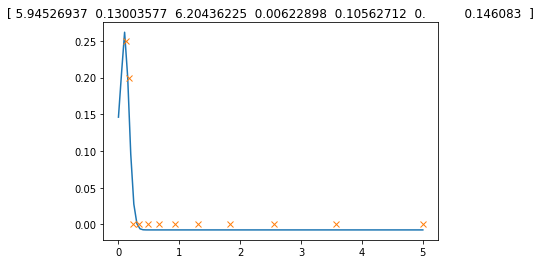

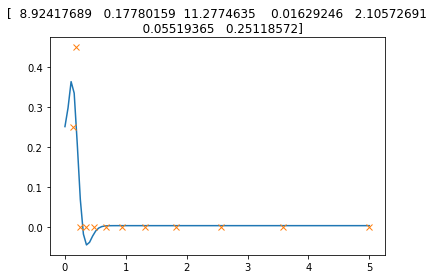

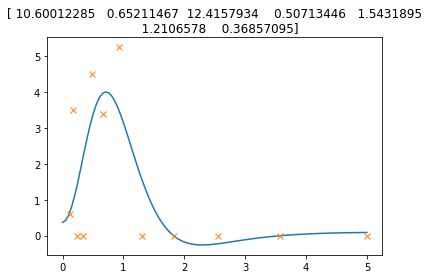

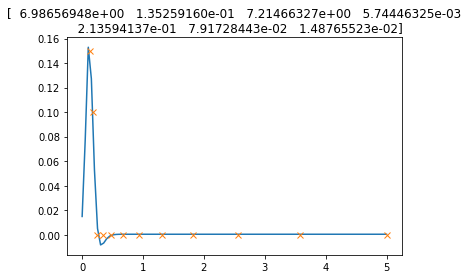

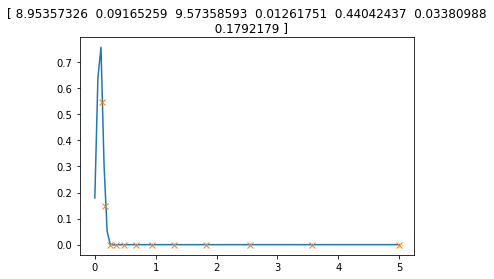

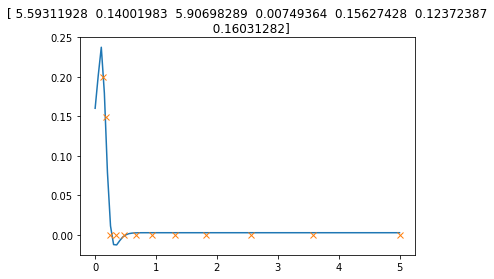

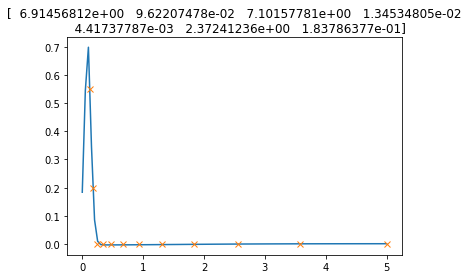

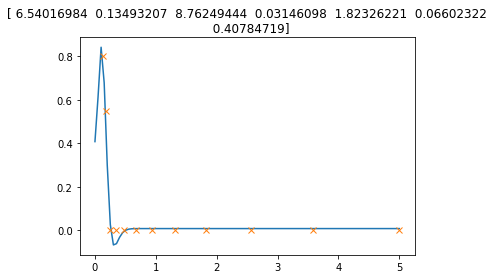

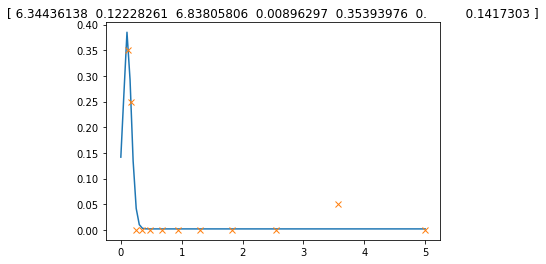

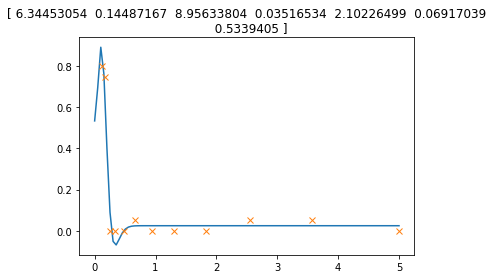

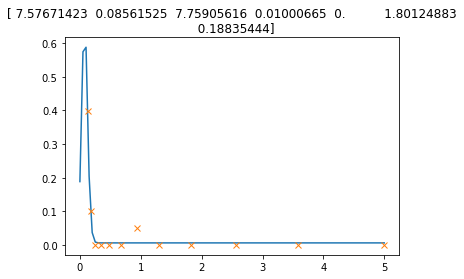

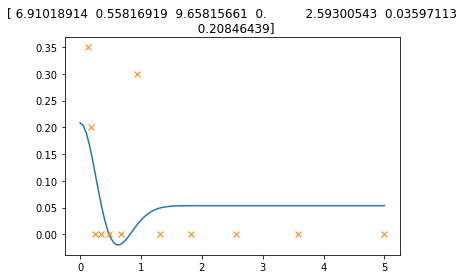

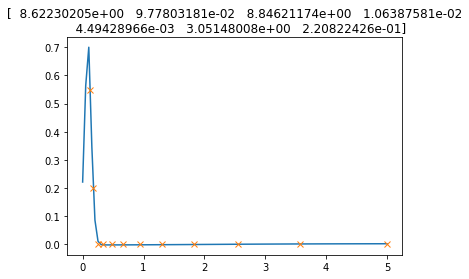

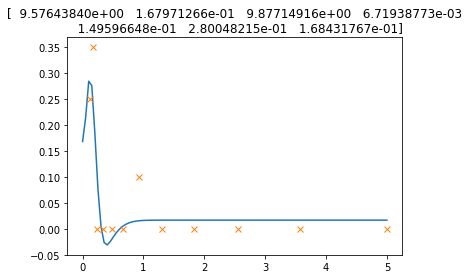

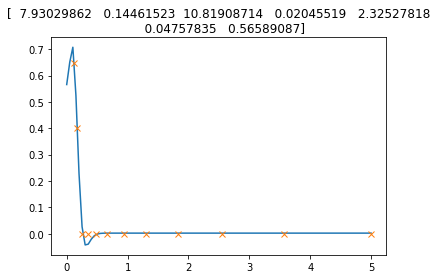

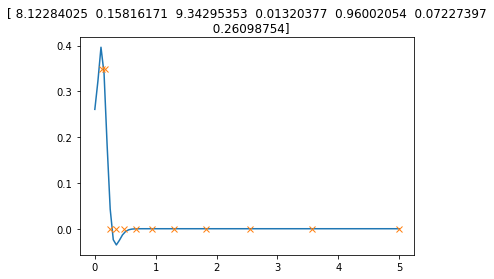

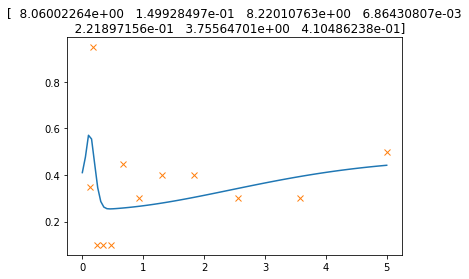

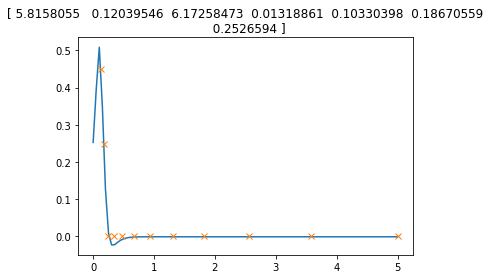

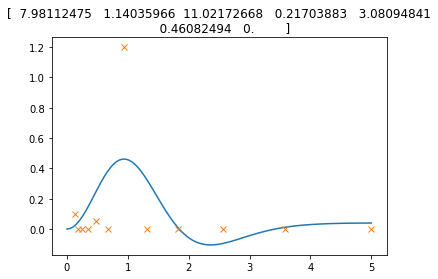

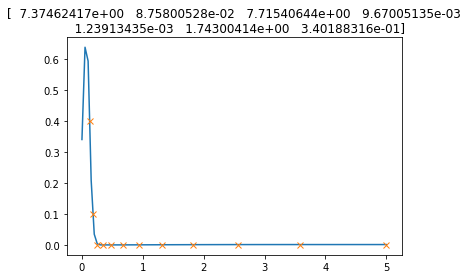

In [17]:
l4_lc_crf_size,l4_lc_si,l4_lc_csi = zip(*[size_tuning_measures(numpy.linspace(0,10.0,100),_fitgaussian(*get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name='V1_Exc_L4',st_name='DriftingSinusoidalGratingDisk',analysis_algorithm='TrialAveragedFiringRate',value_name='Firing rate',st_contrast=100),neuron))) for neuron in center4[:20]])

/home/antolikjan/virt_env/mozaik/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in divide
/home/antolikjan/virt_env/mozaik/lib/python2.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


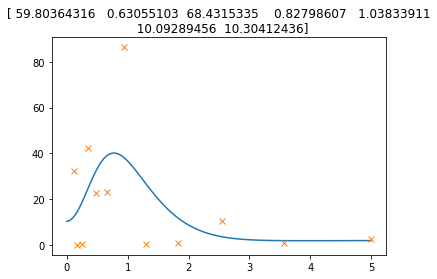

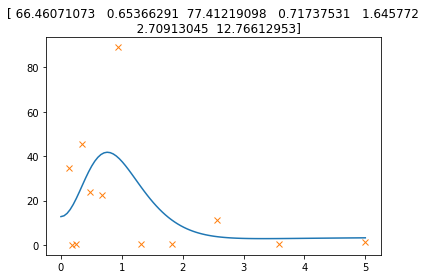

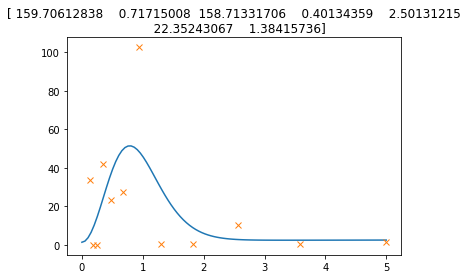

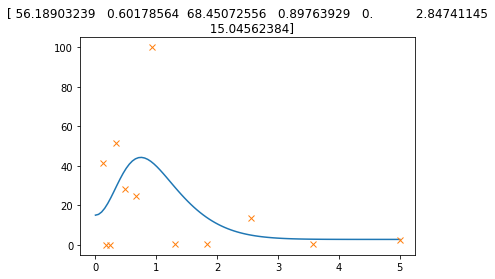

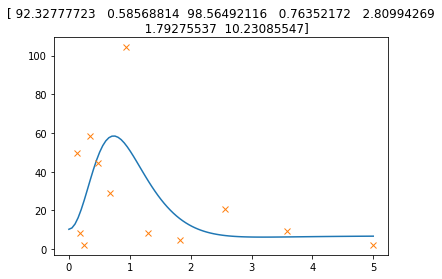

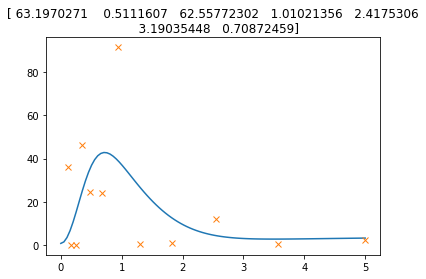

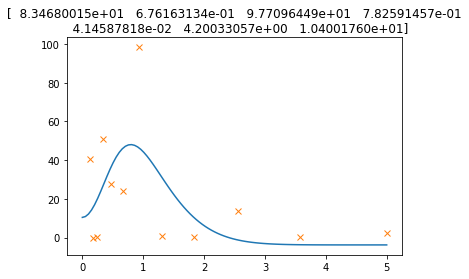

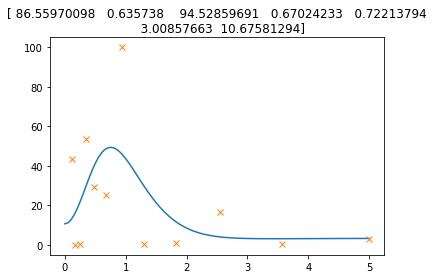

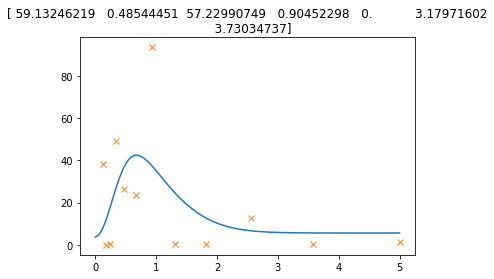

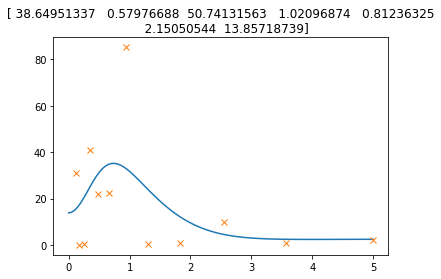

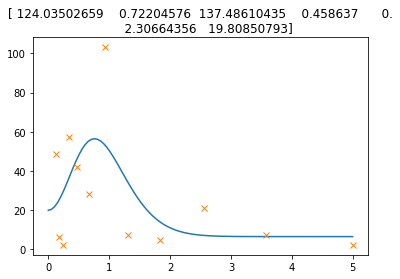

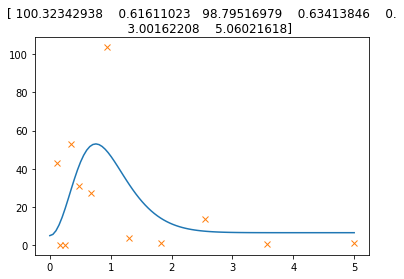

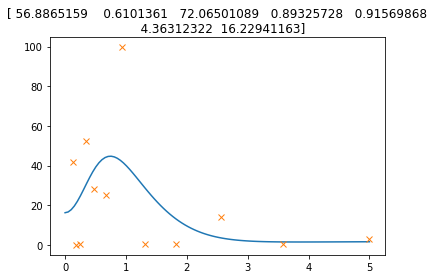

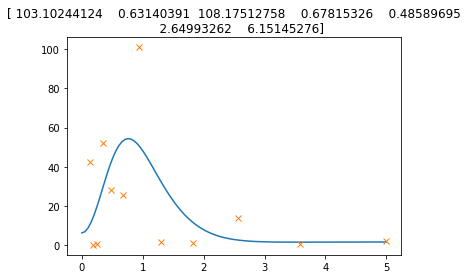

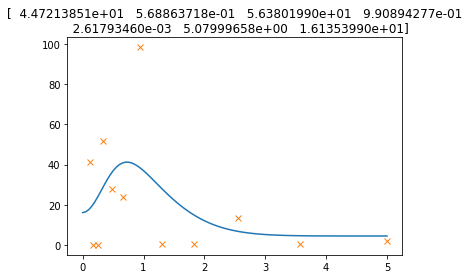

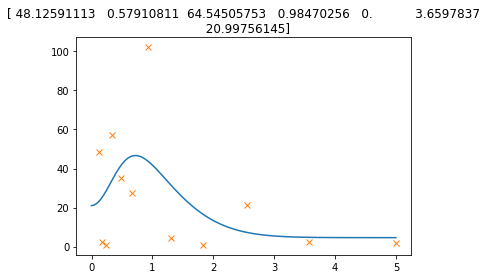

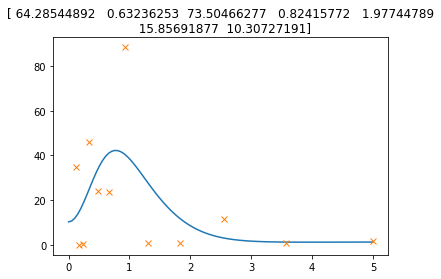

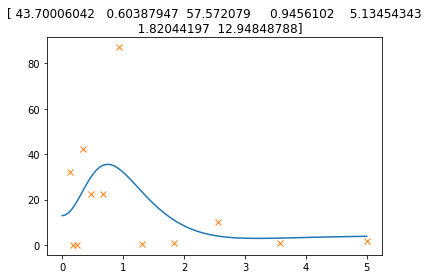

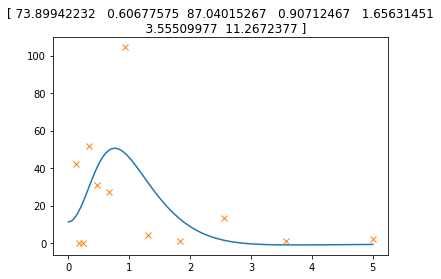

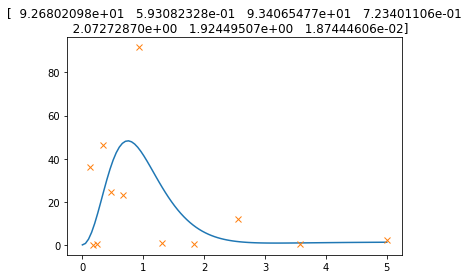

In [18]:
l4_lc_crf_size,l4_lc_si,l4_lc_csi = zip(*[size_tuning_measures(numpy.linspace(0,10.0,100),_fitgaussian(*get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name='V1_Exc_L4',st_name='DriftingSinusoidalGratingDisk',analysis_algorithm='TrialAveragedFiringRate',value_name='Firing rate',st_contrast=30),neuron))) for neuron in center4[:20]])

In [8]:
def example_neuron(neuron,line,sheet):
          low_contrast=10
          fontsize=15
          rads_lc , values_lc  = get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name=sheet,st_name='DriftingSinusoidalGratingDisk',analysis_algorithm='TrialAveragedFiringRate',st_contrast=low_contrast),neuron)
          fitvalues_lc = _fitgaussian(rads_lc , values_lc)

          rads_hc , values_hc  = get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name=sheet,st_name='DriftingSinusoidalGratingDisk',analysis_algorithm='TrialAveragedFiringRate',st_contrast=100),neuron)
          fitvalues_hc = _fitgaussian(rads_hc , values_hc)/home/antolikjan/virt_env/mozaik/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in divide
                              
          #ax = pylab.subplot(gs[6*line:6*line+6,1:9])
          ax= pylab.figure().gca()
          ax.plot(rads_lc,values_lc,'ok') 
          ax.plot(numpy.linspace(0,3.0,100),fitvalues_lc,'k')
          ax.plot(rads_hc,values_hc,'o',color='#0073B3',markeredgecolor='#0073B3',markeredgewidth=0) 
          ax.plot(numpy.linspace(0,3.0,100),fitvalues_hc,color='#0073B3')
          disable_top_right_axis(pylab.gca())  
          three_tick_axis(ax.yaxis)  
          if line == 2:
            three_tick_axis(ax.xaxis)
          else:
            remove_x_tick_labels()
            disable_xticks(ax)
          for label in pylab.gca().get_xticklabels() + pylab.gca().get_yticklabels():
                  label.set_fontsize(19)
          pylab.ylabel('firing rate (sp/s)',fontsize=fontsize)


          var = 'F1_Vm'
          if line==2:
            var = '-(x+y)(F0_Vm,Mean(VM))'

          rads_lc , values_lc  = get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name=sheet,st_name='DriftingSinusoidalGratingDisk',value_name=[var],st_contrast=low_contrast),neuron)
          fitvalues_lc = _fitgaussian(rads_lc , values_lc)

          rads_hc , values_hc  = get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name=sheet,st_name='DriftingSinusoidalGratingDisk',value_name=[var],st_contrast=100),neuron)
          fitvalues_hc = _fitgaussian(rads_hc , values_hc)
                              
          #ax = pylab.subplot(gs[6*line:6*line+6,11:19])
          ax= pylab.figure().gca()
          ax.plot(rads_lc,values_lc,'ok') 
          ax.plot(numpy.linspace(0,3.0,100),fitvalues_lc,'k')
          ax.plot(rads_hc,values_hc,'o',color='#0073B3',markeredgecolor='#0073B3',markeredgewidth=0) 
          ax.plot(numpy.linspace(0,3.0,100),fitvalues_hc,color='#0073B3')
          disable_top_right_axis(pylab.gca())  
          three_tick_axis(ax.yaxis)  
          if line == 2:
            three_tick_axis(ax.xaxis)
          else:
            disable_xticks(ax)
            remove_x_tick_labels()

          for label in pylab.gca().get_xticklabels() + pylab.gca().get_yticklabels():
                  label.set_fontsize(19)
          pylab.ylabel('Vm (mV)',fontsize=fontsize)

          rads_lc_e , values_lc_e  = get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name=sheet,st_name='DriftingSinusoidalGratingDisk',value_name=['x-y(F0_Exc_Cond,Mean(ECond))'],st_contrast=low_contrast),neuron)
          values_lc_e*=1000
          fitvalues_lc_e = _fitgaussian(rads_lc_e , values_lc_e)

          rads_hc_e , values_hc_e  = get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name=sheet,st_name='DriftingSinusoidalGratingDisk',value_name=['x-y(F0_Exc_Cond,Mean(ECond))'],st_contrast=100),neuron)
          values_hc_e*=1000
          fitvalues_hc_e = _fitgaussian(rads_hc_e, values_hc_e)

          rads_lc_i , values_lc_i  = get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name=sheet,st_name='DriftingSinusoidalGratingDisk',value_name=['x-y(F0_Inh_Cond,Mean(ICond))'],st_contrast=low_contrast),neuron)
          values_lc_i*=1000
          fitvalues_lc_i = _fitgaussian(rads_lc_i , values_lc_i)

          rads_hc_i , values_hc_i  = get_vals(queries.param_filter_query(data_store,identifier='PerNeuronValue',sheet_name=sheet,st_name='DriftingSinusoidalGratingDisk',value_name=['x-y(F0_Inh_Cond,Mean(ICond))'],st_contrast=100),neuron)
          values_hc_i*=1000
          fitvalues_hc_i = _fitgaussian(rads_hc_i, values_hc_i)

            
          #ax = pylab.subplot(gs[6*line:6*line+6,21:29])
          ax= pylab.figure().gca()
          ax.plot(rads_lc_e,values_lc_e,'o',color='#FF0000',markeredgecolor='#FF0000',markeredgewidth=0) 
          ax.plot(numpy.linspace(0,3.0,100),fitvalues_lc_e,color='#FF0000')
          ax.plot(rads_hc_e,values_hc_e,'o',color='#FFACAC',markeredgecolor='#FFACAC',markeredgewidth=0) 
          ax.plot(numpy.linspace(0,3.0,100),fitvalues_hc_e,color='#FFACAC')
          
          ax.plot(rads_lc_i,values_lc_i,'o',color='#0000FF',markeredgecolor='#0000FF',markeredgewidth=0) 
          ax.plot(numpy.linspace(0,3.0,100),fitvalues_lc_i,color='#0000FF')
          ax.plot(rads_hc_i,values_hc_i,'o',color='#ACACFF',markeredgecolor='#ACACFF',markeredgewidth=0) 
          ax.plot(numpy.linspace(0,3.0,100),fitvalues_hc_i,color='#ACACFF')

          disable_top_right_axis(pylab.gca())  
          if line == 2:
            three_tick_axis(ax.xaxis)
          else:
            remove_x_tick_labels()
            disable_xticks(ax)

          three_tick_axis(ax.yaxis)  
          for label in pylab.gca().get_xticklabels() + pylab.gca().get_yticklabels():
                  label.set_fontsize(19)
          pylab.ylabel('conductance (nS)',fontsize=fontsize)



/home/antolikjan/virt_env/mozaikold/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in divide


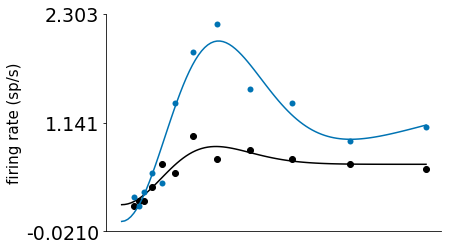

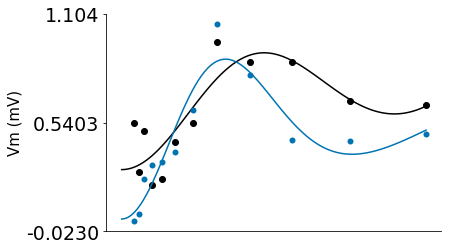

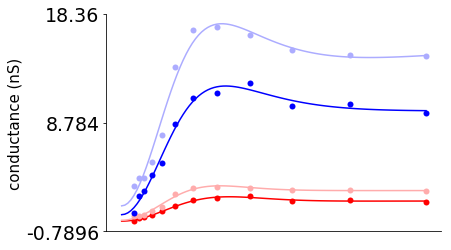

In [95]:
example_neuron(list(analog_center23)[0],1,'V1_Exc_L2/3')  
#example_neuron(not_nice_neuron_l4,1,'V1_Exc_L4')  
#example_neuron(nice_neuron_l23,2,'V1_Exc_L2/3')  


/home/antolikjan/virt_env/mozaikold/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in divide


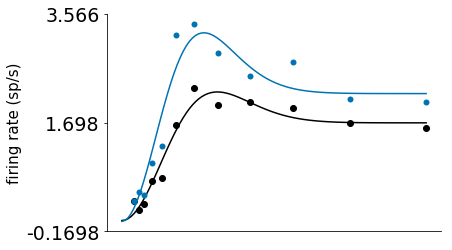

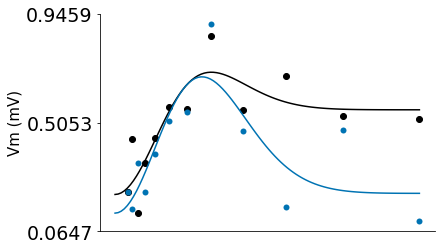

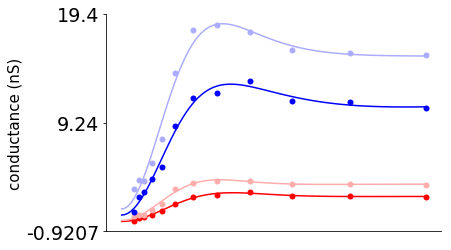

In [96]:
example_neuron(list(analog_center23)[1],1,'V1_Exc_L2/3')  

/home/antolikjan/virt_env/mozaikold/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in divide


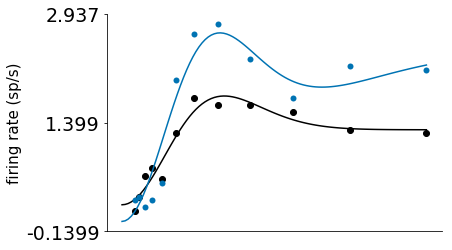

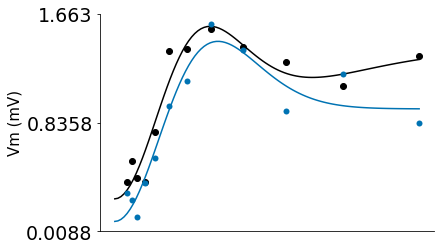

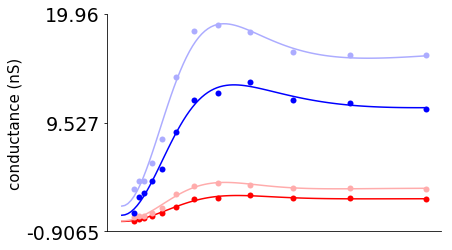

In [97]:
example_neuron(list(analog_center23)[2],1,'V1_Exc_L2/3')  

In [98]:
print list(analog_center23)[2]

60674


  Starting STModulationRatio analysis
  DSV info:
     Number of recordings: 40
       DriftingSinusoidalGratingDisk : 40
     Number of ADS: 224
       AnalogSignalList : 20
       PerNeuronValue : 204
  DSV info:
     Number of recordings: 0
     Number of ADS: 20
       AnalogSignalList : 20


V1_Exc_L4


STModulationRatio analysis took: 10.1345219612seconds
  Starting STModulationRatio analysis
  DSV info:
     Number of recordings: 40
       DriftingSinusoidalGratingDisk : 40
     Number of ADS: 224
       AnalogSignalList : 20
       PerNeuronValue : 204
  DSV info:
     Number of recordings: 0
     Number of ADS: 20
       AnalogSignalList : 20


V1_Exc_L2/3


STModulationRatio analysis took: 11.0893330574seconds


NameError: name 'd' is not defined

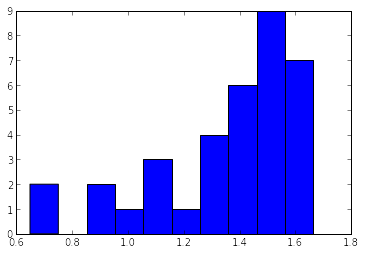

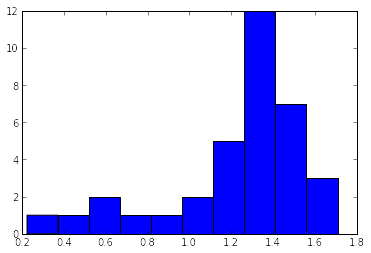

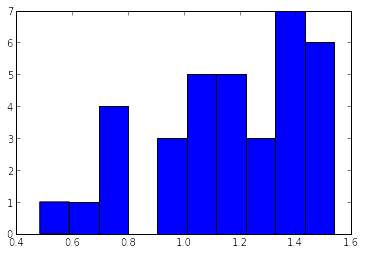

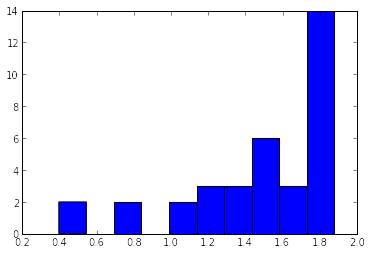

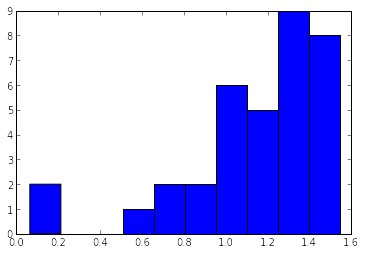

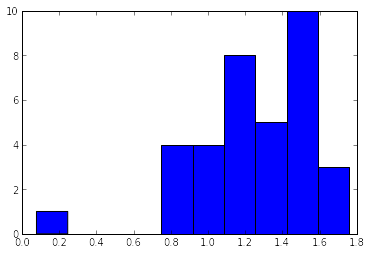

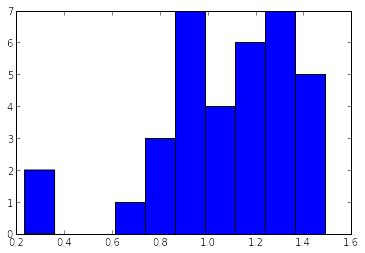

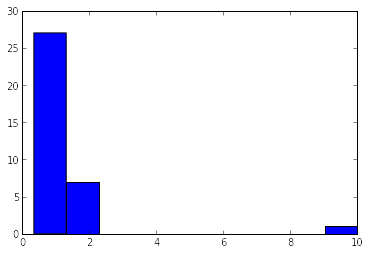

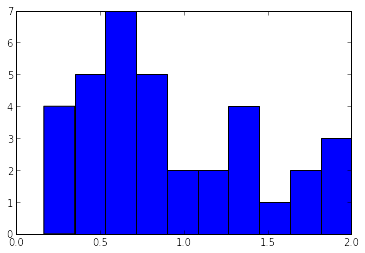

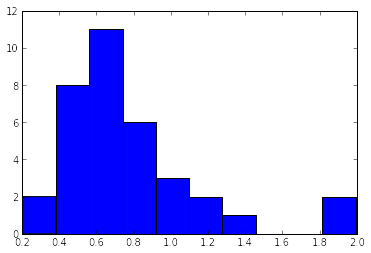

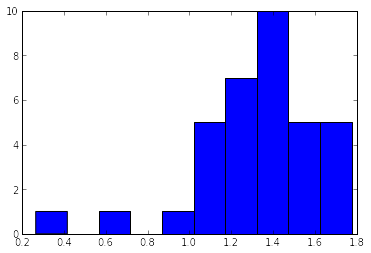

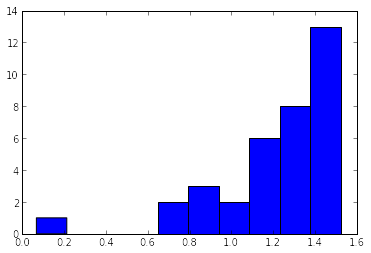

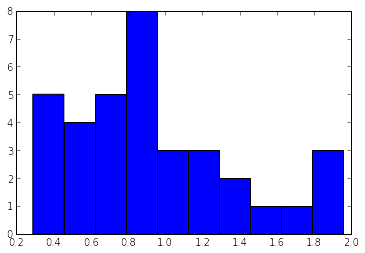

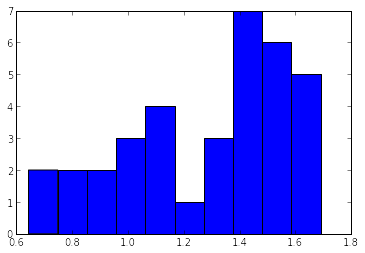

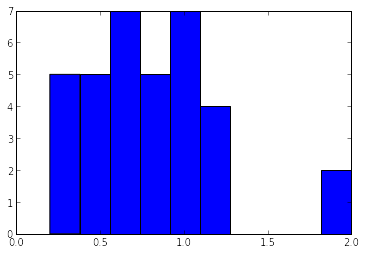

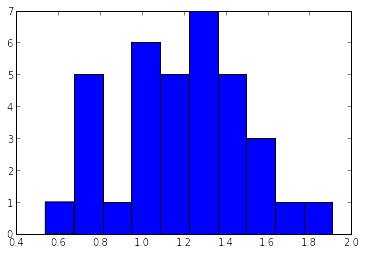

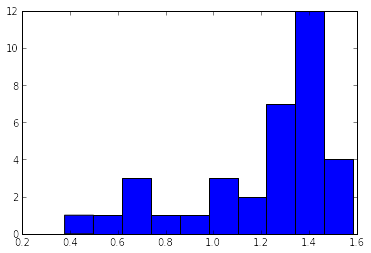

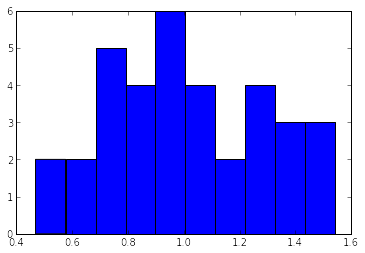

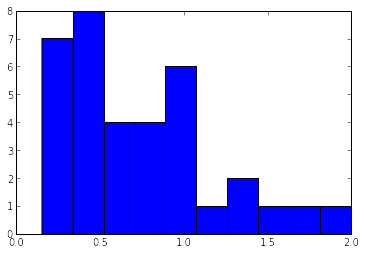

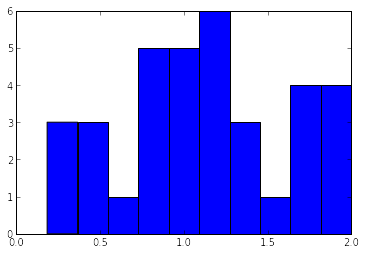

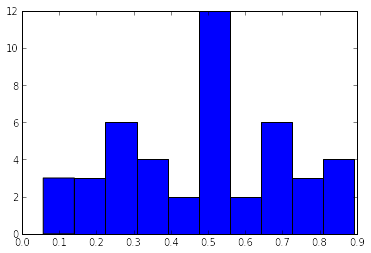

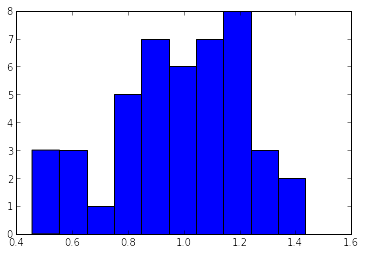

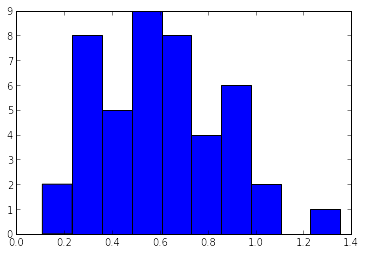

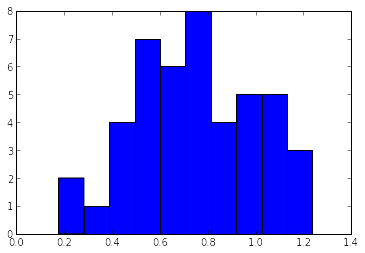

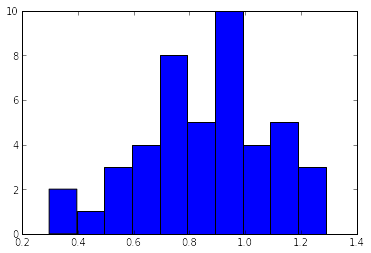

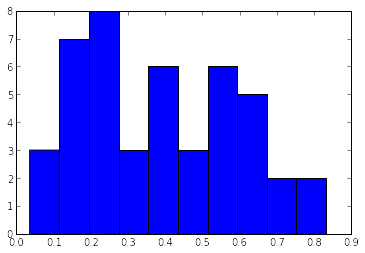

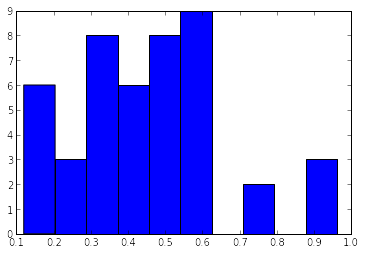

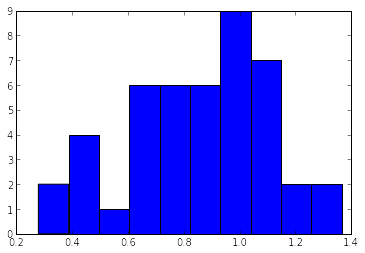

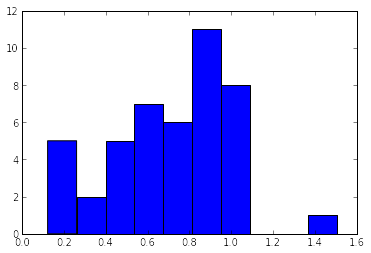

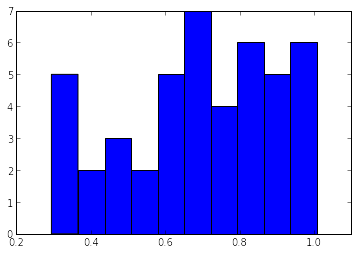

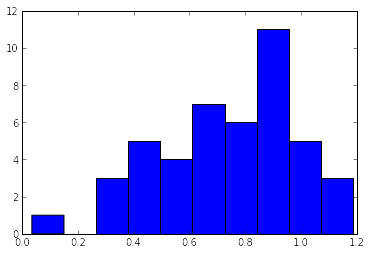

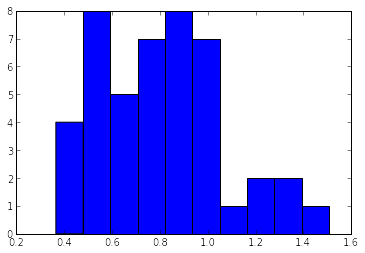

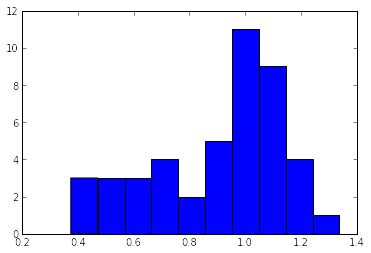

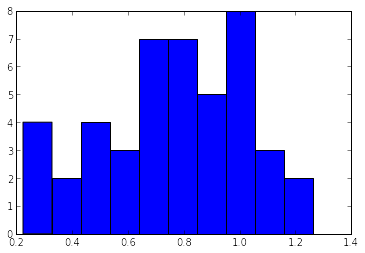

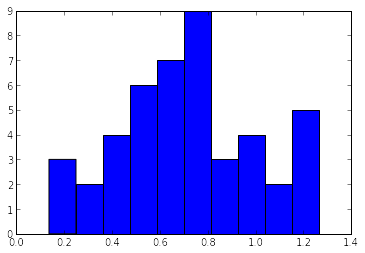

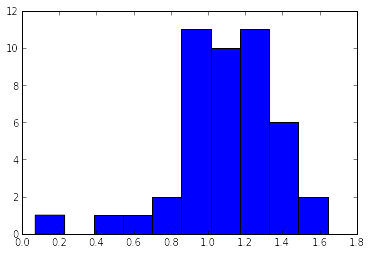

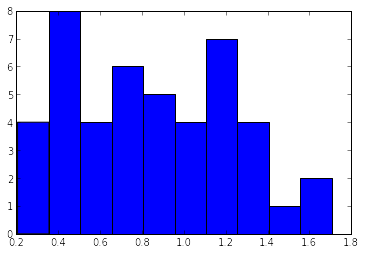

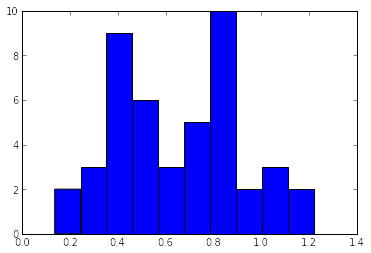

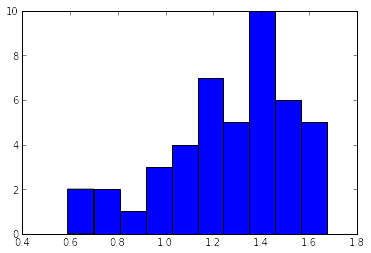

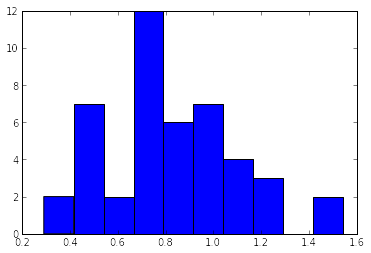

In [123]:
class STModulationRatio(Analysis):
    """
    This analysis calculates the modulation ration (as the F1/F0) for all
    neurons in the data using all available responses recorded to the
    FullfieldDriftingSinusoidalGrating stimuli. This method also requires
    that 'orientation preference' has already been calculated for all the 
    neurons.
    
    The `ModulationRatio` takes all responses recorded to the FullfieldDriftingSinusoidalGrating and
    calculates their PSTH.  Then it collapses this list of PSTHs into groups, each containing PSTH associated
    with the same FullfieldDriftingSinusoidalGrating stimulus with the  exception of the orientation. 
    For each such group it then goes through each recorded neuron and selects the closest 
    presented orientation to the orientation peference of the given neuron, and using the PSTH associated 
    with this selected orientation it calculates the modulation ratio for that neuron. This way for each
    group it will calculate modulation ratios for all recorded neurons, and will store them in datastore
    using the PerNeuronValue data structure.
    """
    required_parameters =ParameterSet({
        'ids' : list,
    })

    def perform_analysis(self):
        for sheet in self.datastore.sheets():
            # Load up spike trains for the right sheet and the corresponding
            # stimuli, and transform spike trains into psth
            print sheet
            self.datastore.print_content()
            dsv = queries.param_filter_query(self.datastore,identifier='AnalogSignalList',sheet_name=sheet,analysis_algorithm='PSTH',st_name='DriftingSinusoidalGratingDisk')
            dsv.print_content()
            assert queries.equal_ads(dsv,except_params=['stimulus_id']) , "It seems PSTH computed in different ways are present in datastore, ModulationRatio can accept only one"
            psths = dsv.get_analysis_result()
            st = [MozaikParametrized.idd(p.stimulus_id) for p in psths]
            # average across trials
            psths, stids = colapse(psths,st,parameter_list=['trial'],func=neo_sum,allow_non_identical_objects=True)
            
            for (ppsth, st) in zip(psths, stids):
                # here we will store the modulation ratios, one per each neuron
                modulation_ratio = []
                f0 = []
                f1 = []
                ids = []
                frequency = MozaikParametrized.idd(st).temporal_frequency * MozaikParametrized.idd(st).params()['temporal_frequency'].units
                for idd in self.parameters.ids:
                            mr,F0,F1 = self._calculate_MR(ppsth.get_asl_by_id(idd),frequency)
                            modulation_ratio.append(mr)
                            f0.append(F0)
                            f1.append(F1)
                            ids.append(idd)
                            
                logger.debug('Adding PerNeuronValue:' + str(sheet))
                self.datastore.full_datastore.add_analysis_result(
                    PerNeuronValue(modulation_ratio,
                                   ids,
                                   qt.dimensionless,
                                   value_name='Modulation ratio' + '(' + psths[0].x_axis_name + ')',
                                   sheet_name=sheet,
                                   tags=self.tags,
                                   period=None,
                                   analysis_algorithm=self.__class__.__name__,
                                   stimulus_id=str(st)))

                self.datastore.full_datastore.add_analysis_result(
                    PerNeuronValue(f0,
                                   ids,
                                   qt.dimensionless,
                                   value_name='F0' + '(' + psths[0].x_axis_name + ')',
                                   sheet_name=sheet,
                                   tags=self.tags,
                                   period=None,
                                   analysis_algorithm=self.__class__.__name__,
                                   stimulus_id=str(st)))
                
                self.datastore.full_datastore.add_analysis_result(
                    PerNeuronValue(f1,
                                   ids,
                                   qt.dimensionless,
                                   value_name='F1' + '(' + psths[0].x_axis_name + ')',
                                   sheet_name=sheet,
                                   tags=self.tags,
                                   period=None,
                                   analysis_algorithm=self.__class__.__name__,
                                   stimulus_id=str(st)))


                import pylab
                pylab.figure()
                pylab.hist(modulation_ratio)

    def _calculate_MR(self,signal, frequency):
        """
        Calculates MR at frequency 1/period for each of the signals in the signal_list

        Returns an array of MRs on per each signal in signal_list
        """
        duration = signal.t_stop - signal.t_start
        period = 1/frequency
        period = period.rescale(signal.t_start.units)
        cycles = duration / period
        first_har = round(cycles)

        fft = numpy.fft.fft(signal)

        if abs(fft[0]) != 0:
            return 2*abs(fft[first_har])/abs(fft[0]),abs(fft[0]),2*abs(fft[first_har]),
        else:
            return 10,abs(fft[0]),2*abs(fft[first_har]),

STModulationRatio(param_filter_query(data_store,sheet_name=['V1_Exc_L4'],st_contrast=[5]),ParameterSet({'ids' : list(center4)})).analyse()
STModulationRatio(param_filter_query(data_store,sheet_name=['V1_Exc_L2/3'],st_contrast=[5]),ParameterSet({'ids' : list(center23)})).analyse()


In [84]:
dsv_l4 = param_filter_query(data_store,identifier='PerNeuronValue',sheet_name='V1_Exc_L4',analysis_algorithm='STModulationRatio',value_name='Modulation ratio(time)',st_radius=0.56324103179562113,st_contrast=100).get_analysis_result()
print len(dsv_l4)
dsv = param_filter_query(data_store,identifier='PerNeuronValue',sheet_name='V1_Exc_L4',analysis_algorithm='STModulationRatio',value_name='Modulation ratio(time)',st_radius=0.56324103179562113,st_contrast=100)
print len(dsv.get_analysis_result())
print len(data_store.get_analysis_result(identifier='PerNeuronValue',sheet_name='V1_Exc_L4',analysis_algorithm='STModulationRatio',value_name='Modulation ratio(time)',st_radius=0.56324103179562113,st_contrast=100))

1
1
0


In [6]:
class MRfigReal(Plotting):
      required_parameters = ParameterSet({
            'SimpleSheetName' : str,  #the name of the sheet for which to plot
            'ComplexSheetName' : str, # which neuron to show
            'simple_ids' : list,
            'complex_ids' : list,
            'radius' : float
      })

      def plot(self):
          self.fig = pylab.figure(facecolor='w', **self.fig_param)
          gs = gridspec.GridSpec(1, 1)
          gs.update(left=0.07, right=0.97, top=0.9, bottom=0.1)
          gs = gs[0,0]
          
          
            
          dsv_l4 = param_filter_query(self.datastore,identifier='PerNeuronValue',sheet_name=self.parameters.SimpleSheetName,analysis_algorithm='STModulationRatio',value_name='Modulation ratio(time)',st_radius=self.parameters.radius).get_analysis_result()
          dsv_l23 = param_filter_query(self.datastore,identifier='PerNeuronValue',sheet_name=self.parameters.ComplexSheetName,analysis_algorithm='STModulationRatio',value_name='Modulation ratio(time)',st_radius=self.parameters.radius).get_analysis_result()
          
          dsv = queries.param_filter_query(self.datastore,st_name='DriftingSinusoidalGratingDisk',st_orientation=0,st_radius=self.parameters.radius)
          dsv_l4_v_F0 = dsv.get_analysis_result(identifier='PerNeuronValue',sheet_name=self.parameters.SimpleSheetName,value_name='-(x+y)(F0_Vm,Mean(VM))')
          dsv_l23_v_F0 = dsv.get_analysis_result(identifier='PerNeuronValue',sheet_name=self.parameters.ComplexSheetName,value_name='-(x+y)(F0_Vm,Mean(VM))')
          dsv_l4_v_F1 = dsv.get_analysis_result(identifier='PerNeuronValue',sheet_name=self.parameters.SimpleSheetName,value_name='F1_Vm')
          dsv_l23_v_F1 = dsv.get_analysis_result(identifier='PerNeuronValue',sheet_name=self.parameters.ComplexSheetName,value_name='F1_Vm')

          print dsv_l4_v_F0[0].values
          print dsv_l4_v_F0[0].get_value_by_id(self.parameters.simple_ids)
          print numpy.mean(dsv_l4_v_F0[0].values)
          print numpy.mean(dsv_l4_v_F0[0].get_value_by_id(self.parameters.simple_ids))
            
          assert len(dsv_l4) == 1,  str(len(dsv_l4))
          assert len(dsv_l4_v_F0) == 1
          assert len(dsv_l4_v_F1) == 1
          if self.parameters.ComplexSheetName != 'None':
              assert len(dsv_l23) == 1
              assert len(dsv_l23_v_F0) == 1
              assert len(dsv_l23_v_F1) == 1
          
          l4_ids = self.parameters.simple_ids  
          l23_ids = self.parameters.complex_ids  
          
          l4_v_mr = numpy.array(dsv_l4_v_F1[0].get_value_by_id(l4_ids))/abs(numpy.array(dsv_l4_v_F0[0].get_value_by_id(l4_ids)))
          dsv_l4 = dsv_l4[0]
          if self.parameters.ComplexSheetName != 'None':
            l23_v_mr = numpy.array(dsv_l23_v_F1[0].get_value_by_id(l23_ids))/abs(numpy.array(dsv_l23_v_F0[0].get_value_by_id(l23_ids)))
            dsv_l23= dsv_l23[0]

          dsv_simple = numpy.append(dsv_l4.values[dsv_l4.values<1.0],dsv_l23.values[dsv_l23.values<1.0])
          dsv_complex = numpy.append(dsv_l4.values[dsv_l4.values>1.0],dsv_l23.values[dsv_l23.values>1.0])

          simple_mr = numpy.append(numpy.array(dsv_l4.get_value_by_id(l4_ids))[numpy.array(dsv_l4.get_value_by_id(l4_ids))<1.0],numpy.array(dsv_l23.get_value_by_id(l23_ids))[numpy.array(dsv_l23.get_value_by_id(l23_ids))<1.0])  
          complex_mr = numpy.append(numpy.array(dsv_l4.get_value_by_id(l4_ids))[numpy.array(dsv_l4.get_value_by_id(l4_ids))>1.0],numpy.array(dsv_l23.get_value_by_id(l23_ids))[numpy.array(dsv_l23.get_value_by_id(l23_ids))>1.0])  

          simple_v_mr = numpy.append(l4_v_mr[numpy.array(dsv_l4.get_value_by_id(l4_ids))<1.0],l23_v_mr[numpy.array(dsv_l23.get_value_by_id(l23_ids))<1.0])  
          complex_v_mr = numpy.append(l4_v_mr[numpy.array(dsv_l4.get_value_by_id(l4_ids))>1.0],l23_v_mr[numpy.array(dsv_l23.get_value_by_id(l23_ids))>1.0])  
          
          dsv_simple_v_F0 = numpy.append(numpy.array(dsv_l4_v_F0[0].get_value_by_id(l4_ids))[numpy.array(dsv_l4.get_value_by_id(l4_ids))<1.0],numpy.array(dsv_l23_v_F0[0].get_value_by_id(l23_ids))[numpy.array(dsv_l23.get_value_by_id(l23_ids))<1.0])  
          dsv_complex_v_F0 = numpy.append(numpy.array(dsv_l4_v_F0[0].get_value_by_id(l4_ids))[numpy.array(dsv_l4.get_value_by_id(l4_ids))>1.0],numpy.array(dsv_l23_v_F0[0].get_value_by_id(l23_ids))[numpy.array(dsv_l23.get_value_by_id(l23_ids))>1.0])  

          dsv_simple_v_F1 = numpy.append(numpy.array(dsv_l4_v_F1[0].get_value_by_id(l4_ids))[numpy.array(dsv_l4.get_value_by_id(l4_ids))<1.0],numpy.array(dsv_l23_v_F1[0].get_value_by_id(l23_ids))[numpy.array(dsv_l23.get_value_by_id(l23_ids))<1.0])  
          dsv_complex_v_F1 = numpy.append(numpy.array(dsv_l4_v_F1[0].get_value_by_id(l4_ids))[numpy.array(dsv_l4.get_value_by_id(l4_ids))>1.0],numpy.array(dsv_l23_v_F1[0].get_value_by_id(l23_ids))[numpy.array(dsv_l23.get_value_by_id(l23_ids))>1.0])  

          gs = gridspec.GridSpecFromSubplotSpec(3, 7,subplot_spec=gs,wspace=0.3)
          ax = pylab.subplot(gs[0,0])
          ax.hist(dsv_l4.values,bins=numpy.arange(0,2.2,0.2),color='gray',rwidth=0.8)
          disable_top_right_axis(ax)
          disable_left_axis(ax)
          pylab.ylim(0,450)
          disable_xticks(ax)
          remove_x_tick_labels()
          remove_y_tick_labels()
          pylab.ylabel('Layer 4',fontsize=19)
          ax = pylab.subplot(gs[1,0])
          if self.parameters.ComplexSheetName != 'None':
              ax.hist(dsv_l23.values,bins=numpy.arange(0,2.2,0.2),color='gray',rwidth=0.8)
              disable_top_right_axis(ax)
              disable_left_axis(ax)
              pylab.ylim(0,450)
              disable_xticks(ax)
              remove_x_tick_labels()
              remove_y_tick_labels()
              pylab.ylabel('Layer 2/3',fontsize=19)
              
              ax = pylab.subplot(gs[2,0])
              ax.hist([dsv_complex,dsv_simple],bins=numpy.arange(0,2.2,0.2),histtype='barstacked',color=['w','k'],rwidth=0.8)
              disable_top_right_axis(ax) 
              disable_left_axis(ax)  
              pylab.ylim(0,450)
              pylab.ylabel('Pooled',fontsize=19)
              three_tick_axis(ax.xaxis)
              remove_y_tick_labels()
              pylab.xlabel('F1/F0 spikes',fontsize=19)
              for label in ax.get_xticklabels() + ax.get_yticklabels(): 
                  label.set_fontsize(19) 
              disable_top_right_axis(ax)
              disable_left_axis(ax)      
              

          ax = pylab.subplot(gs[0,1])
          ax.hist(l4_v_mr,bins=numpy.arange(0,6,0.6),color='gray',rwidth=0.8)
          disable_top_right_axis(ax)    
          disable_left_axis(ax)      
          disable_xticks(ax)
          remove_x_tick_labels()
          remove_y_tick_labels()
          pylab.title(numpy.mean(simple_v_mr))
          if self.parameters.ComplexSheetName != 'None':
              ax = pylab.subplot(gs[1,1])
              ax.hist(l23_v_mr,bins=numpy.arange(0,6,0.6),color='gray',rwidth=0.8)
              disable_top_right_axis(ax)
              disable_left_axis(ax)
              disable_xticks(ax)
              remove_x_tick_labels()
              remove_y_tick_labels()
              ax = pylab.subplot(gs[2,1])
              ax.hist([complex_v_mr,simple_v_mr],bins=numpy.arange(0,6,0.6),histtype='barstacked',color=['w','k'],rwidth=0.8)
              three_tick_axis(ax.xaxis)
              remove_y_tick_labels()
              pylab.xlabel('F1/F0 Vm',fontsize=19)
              for label in ax.get_xticklabels() + ax.get_yticklabels(): 
                  label.set_fontsize(19) 
              disable_top_right_axis(ax) 
              disable_left_axis(ax)                    

          ax = pylab.subplot(gs[0,2])
          ax.hist(numpy.abs(dsv_l4_v_F0[0].get_value_by_id(l4_ids)),bins=numpy.arange(0,5,0.5),color='gray',rwidth=0.8)
          disable_top_right_axis(ax)
          disable_left_axis(ax)                
          disable_left_axis(ax)      
          disable_xticks(ax)
          remove_x_tick_labels()
          remove_y_tick_labels()
          pylab.title(numpy.mean(dsv_l4_v_F0[0].get_value_by_id(l4_ids)))
          if self.parameters.ComplexSheetName != 'None':
              ax = pylab.subplot(gs[1,2])
              ax.hist(numpy.abs(dsv_l23_v_F0[0].get_value_by_id(l23_ids)),bins=numpy.arange(0,5,0.5),color='gray',rwidth=0.8)
              disable_top_right_axis(ax) 
              disable_left_axis(ax)                
              disable_xticks(ax)
              remove_x_tick_labels()
              remove_y_tick_labels()
              ax = pylab.subplot(gs[2,2])
              ax.hist([numpy.abs(dsv_complex_v_F0),numpy.abs(dsv_simple_v_F0)],bins=numpy.arange(0,5,0.5),histtype='barstacked',color=['w','k'],rwidth=0.8)
              three_tick_axis(ax.xaxis)
              remove_y_tick_labels()
              pylab.xlabel('F0 Vm (mV)',fontsize=19)
              for label in ax.get_xticklabels() + ax.get_yticklabels(): 
                  label.set_fontsize(19) 
              disable_top_right_axis(ax)
              disable_left_axis(ax)

                    
          ax = pylab.subplot(gs[0,3])
          ax.hist(numpy.abs(dsv_l4_v_F1[0].get_value_by_id(l4_ids)),bins=numpy.arange(0,10,1.0),color='gray',rwidth=0.8)
          disable_top_right_axis(ax)      
          disable_left_axis(ax)
          disable_xticks(ax)
          remove_x_tick_labels()
          remove_y_tick_labels()
          pylab.title(numpy.mean(dsv_l4_v_F1[0].get_value_by_id(l4_ids)))
          if self.parameters.ComplexSheetName != 'None':
              ax = pylab.subplot(gs[1,3])
              ax.hist(numpy.abs(dsv_l23_v_F1[0].get_value_by_id(l23_ids)),bins=numpy.arange(0,10,1.0),color='gray',rwidth=0.8)
              disable_top_right_axis(ax)
              disable_left_axis(ax)
              disable_xticks(ax)
              remove_x_tick_labels()
              remove_y_tick_labels()
              ax = pylab.subplot(gs[2,3])
              ax.hist([numpy.abs(dsv_complex_v_F1),numpy.abs(dsv_simple_v_F1)],bins=numpy.arange(0,10,1.0),histtype='barstacked',color=['w','k'],rwidth=0.8)
              three_tick_axis(ax.xaxis)
              remove_y_tick_labels()
              pylab.xlabel('F1 Vm (mV)',fontsize=19)
              for label in ax.get_xticklabels() + ax.get_yticklabels(): 
                  label.set_fontsize(19) 
              disable_top_right_axis(ax) 
              disable_left_axis(ax)
              
          logger.info(len(simple_v_mr))
          logger.info(len(dsv_simple))
          if self.parameters.ComplexSheetName != 'None':  
              ggs = gridspec.GridSpecFromSubplotSpec(20, 20, gs[:,4:7])
              ax = pylab.subplot(ggs[3:18,3:18])
              ax.plot(simple_v_mr,simple_mr,'ow',label='layer 4')
              ax.plot(complex_v_mr,complex_mr,'ok',label='layer 2/3')
              pylab.xlabel('F1/F0 Vm',fontsize=19)
              pylab.ylabel('F1/F0 Spikes',fontsize=19)
              pylab.xlim(0,8.0)  
              pylab.ylim(0,2.0)  
              for label in ax.get_xticklabels() + ax.get_yticklabels(): 
                  label.set_fontsize(19) 
            
          if self.plot_file_name:
                        pylab.savefig(Global.root_directory+self.plot_file_name)





In [7]:
MRfigReal(param_filter_query(data_store,st_contrast=[100],st_name='DriftingSinusoidalGratingDisk'),ParameterSet({'SimpleSheetName' : 'V1_Exc_L4','ComplexSheetName' : 'V1_Exc_L2/3','simple_ids' : list(analog_center4),'complex_ids' : list(analog_center23),'radius' : 3.0}),plot_file_name='MR.png',fig_param={'dpi' : 100,'figsize': (19,12)}).plot()
#MRfigReal(param_filter_query(data_store,st_contrast=[100],st_name='DriftingSinusoidalGratingDisk'),ParameterSet({'SimpleSheetName' : 'V1_Exc_L4','ComplexSheetName' : 'V1_Exc_L2/3','simple_ids' : list(analog_center4),'complex_ids' : list(analog_center23),'radius' : 0.56324103179562113}),plot_file_name='MR.png',fig_param={'dpi' : 100,'figsize': (19,12)}).plot()
#MRfigReal(param_filter_query(data_store,st_contrast=[100],st_name='DriftingSinusoidalGratingDisk'),ParameterSet({'SimpleSheetName' : 'V1_Exc_L4','ComplexSheetName' : 'V1_Exc_L2/3','simple_ids' : list(analog_center4),'complex_ids' : list(analog_center23),'radius' : 3.0}),plot_file_name='MR.png',fig_param={'dpi' : 100,'figsize': (19,12)}).plot()

[ 3.26186006  3.14291378  2.01126822  3.53204844  2.27622085  2.65749791
  2.47564272  2.52851802  2.7818611   1.97196904  3.87545074  1.9722946
  1.8114796   2.61237695  2.10261827  1.96782902  1.90486615  2.52666964
  1.87244699  2.54034697  2.07995404  3.39506757  2.34082642  2.57871365
  2.54193031  1.42277257  2.30165436  2.93372889  2.10882434  2.29794411
  2.19958129  3.20803124  3.27586051  1.42569206  2.34987293  2.71052778
  2.76272615  2.60497149  2.9816203   3.17050597  1.52937089  1.66336987
  2.16388512  2.342074    2.60007922  2.66462494  3.15432645  2.44120811
  1.686608    2.44827969  3.02755096]
[3.2618600609077504, 2.0112682172262026, 2.4756427236346497, 1.9719690359338244, 1.9722946019581826, 2.6123769534202097, 1.9048661526605741, 3.3950675726917439, 2.3016543581004214, 2.1088243373744291, 3.2758605122692472, 2.7105277782525832, 2.5285180155319296, 2.9816203028078121, 3.1705059672307812, 1.5293708892776579, 2.6000792177860035, 2.6646249419658119, 1.6866080040251603

AssertionError: 0